In [1]:
# import libraries 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import math as m
import random

In [6]:
#_________________________________The Metropolis-Hasting algorithm (see chapter $\ref{MHA}$)_________________________________
'''
The function $initialize_spinconfig()$ generates a random spin configuration with spins $\sigma\,\epsilon\, \{1,-1\}$ on a 2d squared lattice with dimension $L\timesL$. 
'''
def initialize_spinconfig(L):
    #  L × L matrix is randomly filled with either 1 or -1
    spinconfig = np.random.choice([-1, 1], size=(L, L))
    return spinconfig

'''
The function, $plot_spinconfig()$, illustrates the spin configurations in a plot.
'''
def plot_spinconfig(spinconfig):
    #  The class colors.ListedColormap maps the spins $\sigma\,\epsilon\, \{1,-1\}$ to colors
    #  Spin down (-1) becomes black and spin up (1) becomes white
    cmap = colors.ListedColormap(['black', 'white'])
    # Creation of the plot
    fig, ax = plt.subplots()
    ax.imshow(spinconfig, cmap=cmap)
    

"""
The function $random_spin()$ randomly selects a spin from the spin configuration.
"""
def random_spin(spinconfig):
    x = random.randint(0, spinconfig.shape[0] - 1)
    y = random.randint(0, spinconfig.shape[0] - 1)
    return (x, y)
    
'''
The function $energy_difference()$ computes the change in energy that results from flipping a spin at position $(i,j)$ in the spin configuration.
'''
def energy_difference(spinconfig, i, j):
    # Computing the positions of the nearest neighbors of the spin at position $(i,j)$
    n = spinconfig.shape[0]
    if i == 0:
        NN_left = n - 1
    else:
        NN_left = i - 1
    if i == n - 1:
        NN_right = 0
    else:
        NN_right = i + 1
    if j == n - 1:
        NN_up = 0
    else:
        NN_up = j + 1
    if j == 0:
        NN_down = n - 1
    else:
        NN_down = j - 1
    
    # We assume $J = 1$ and use $(\ref{IsingEnergydiff})$ to compute the change in energy that results from flipping the spin at position $(i,j)$
    dE = 2 * spinconfig[i, j] * (
            spinconfig[NN_left, j] + spinconfig[NN_right, j] + spinconfig[i, NN_up] + spinconfig[i, NN_down])
    return dE

'''
The function $spin_flip()$ rejects or accepts the new spin configuration that resulted from randomly flipping a spin in a given spin configuration. 
'''
def spin_flip(spinconfig, T):
    # Step 2a of the Metropolis-Hasting algorithm (see chapter $\ref{MHA}$)
    # Random selection of a spin from the given spin configuration 
    i, j = random_spin(spinconfig)
    # Step 2b of the Metropolis-Hasting algorithm (see chapter $\ref{MHA}$)
    # Computation of the change in energy that results from flipping this spin 
    dE = energy_difference(spinconfig, i, j)
    # Step 2c of the Metropolis-Hasting algorithm (see chapter $\ref{MHA}$)
    # A new spin configuration that resulted from flipping this spin is accepted or rejected according to equation $(\ref{transition})$ 
    if dE < 0:
        spinconfig[i, j] = -spinconfig[i, j]
    elif random.random() < np.exp(-dE / T):
        spinconfig[i, j] = -spinconfig[i, j]
    # Either the new spin configuration or the initial configuration is returned, depending on whether the new configuration was accepted or rejected    
    return spinconfig


# ___________Generation of the spin configuration of the 2d Ising model at temperature $T$ (see chapter $\ref{MHA}$)___________
'''
The function $generate_spinconfig()$ generates a spin configuration by randomly flipping spins of a given spin configuration $n$ times at temperature $T$. 
'''
def generate_spinconfig(L, T, n):
    # Step 1 of the Metropolis-Hasting algorithm (see chapter $\ref{MHA}$)
    # Generation of an initial random $L\times L$ spin configuration
    spinconfig = initialize_spinconfig(L)
    # Visualization of the initial spin configuration
    plot_spinconfig(spinconfig)
    # Step 2 of the Metropolis-Hasting algorithm (see chapter $\ref{MHA}$)
    # A spin of the spin configuration is randomly selected and flipped $n$ times
    # Each time, a new spin configuration is generated 
    # Either the new spin configuration or the initial configuration is returned, depending on whether the new spin configuration was accepted or rejected 
    for i in range(n):
        spinconfig = spin_flip(spinconfig, T)
    # Visualization of the initial or the new spin configuration 
    plot_spinconfig(spinconfig)
    return spinconfig


<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/var/folders/sr/cp383l690jbc9jcw1p_sxy180000gp/T/ipykernel_9250/1907354787.py:2: SyntaxWarning: invalid escape sequence '\s'
  '''


<>:1: SyntaxWarning: invalid escape sequence '\,'
<>:1: SyntaxWarning: invalid escape sequence '\,'
/var/folders/sr/cp383l690jbc9jcw1p_sxy180000gp/T/ipykernel_9250/1329809304.py:1: SyntaxWarning: invalid escape sequence '\,'
  '''
/var/folders/sr/cp383l690jbc9jcw1p_sxy180000gp/T/ipykernel_9250/1907354787.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


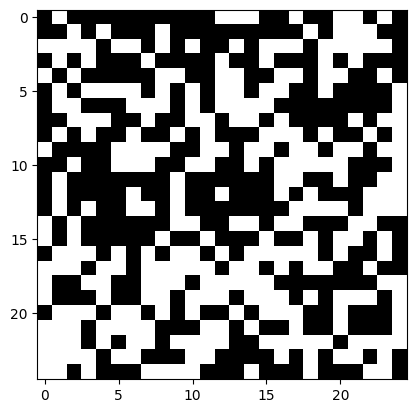

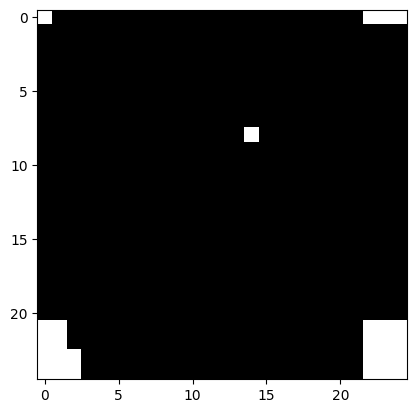

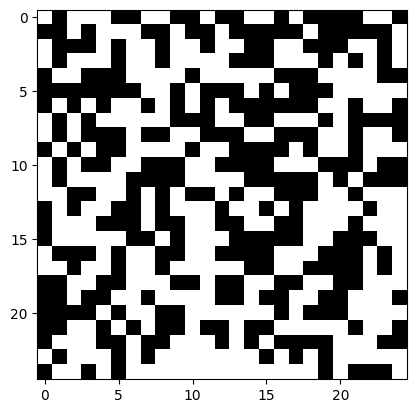

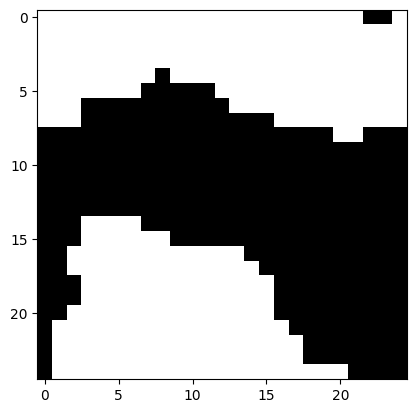

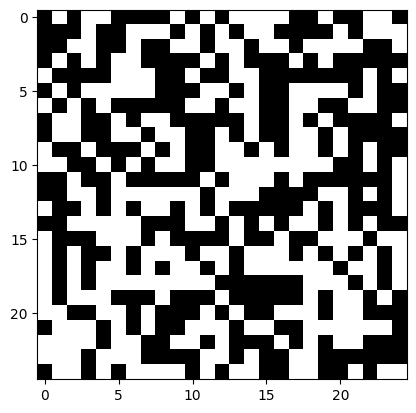

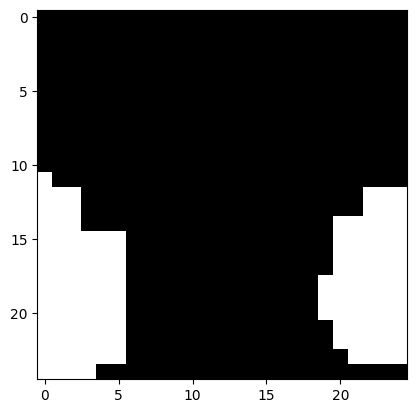

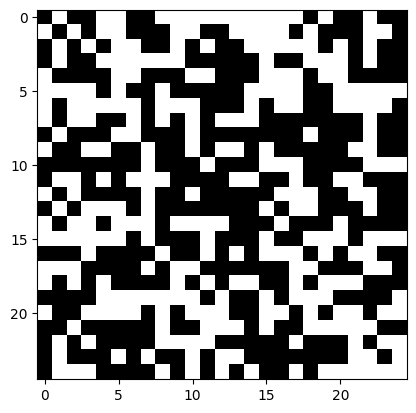

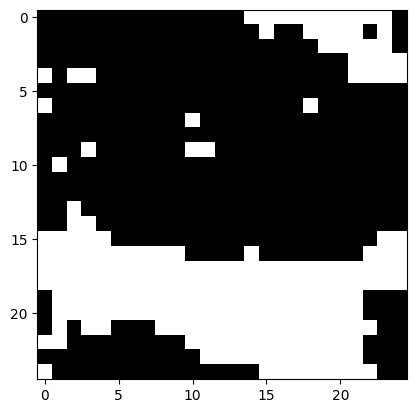

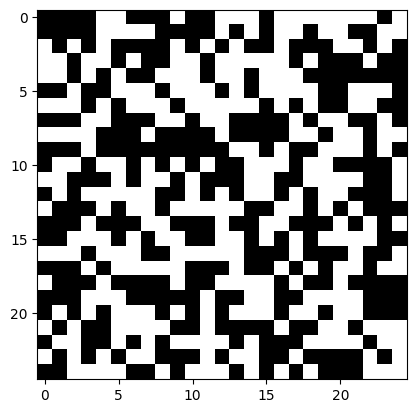

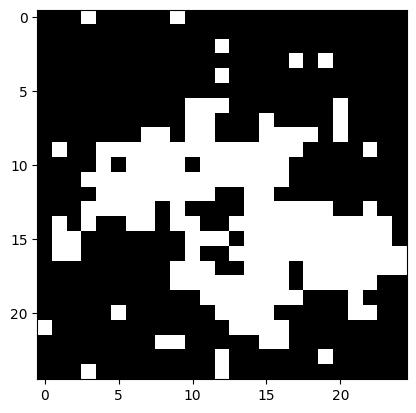

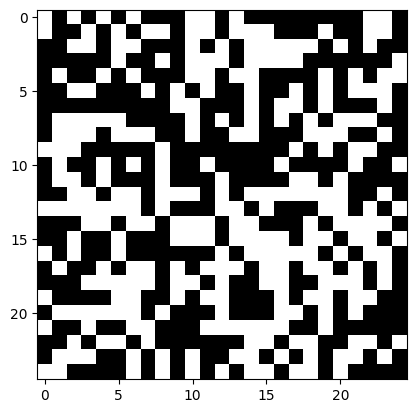

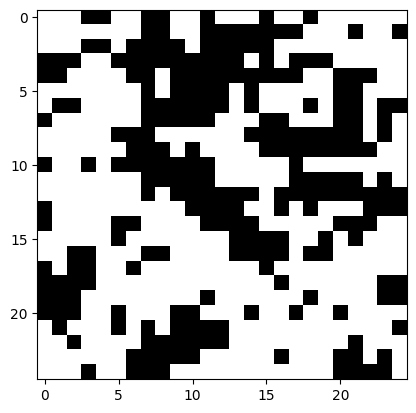

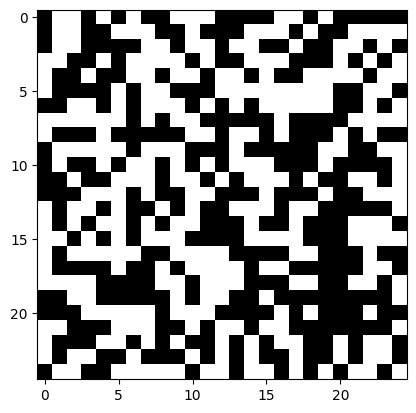

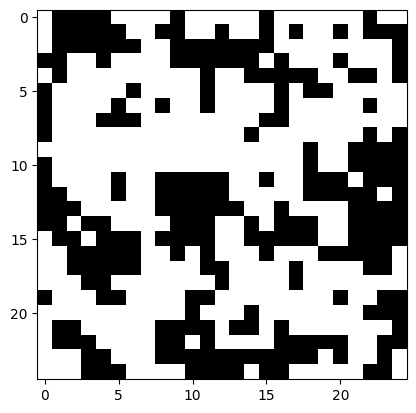

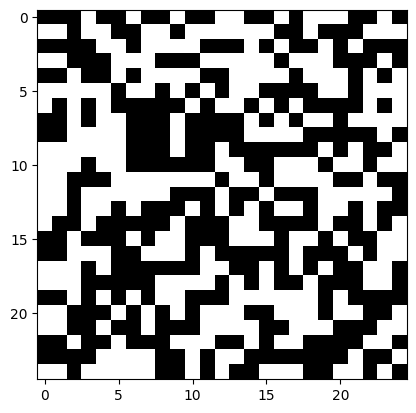

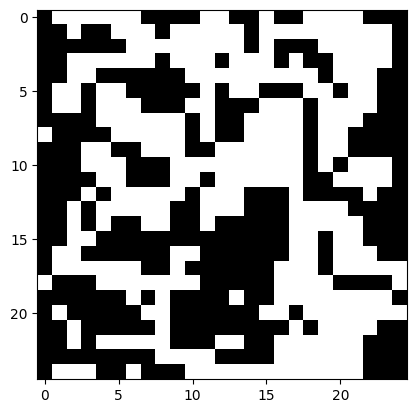

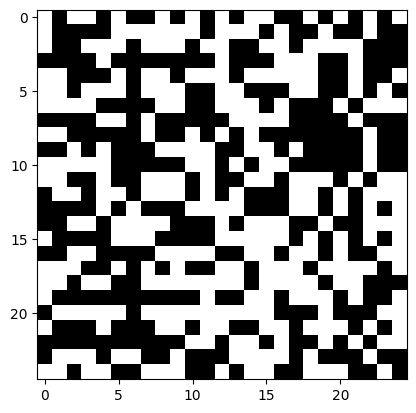

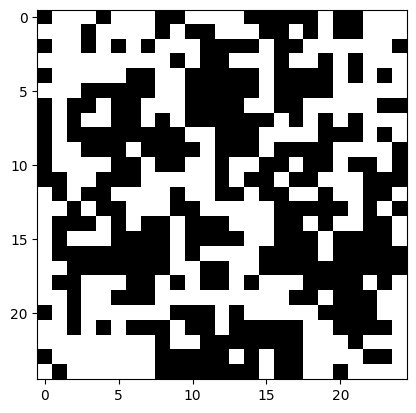

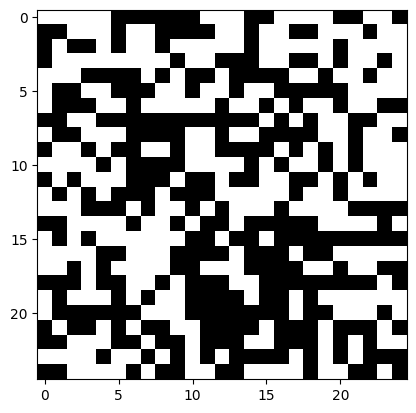

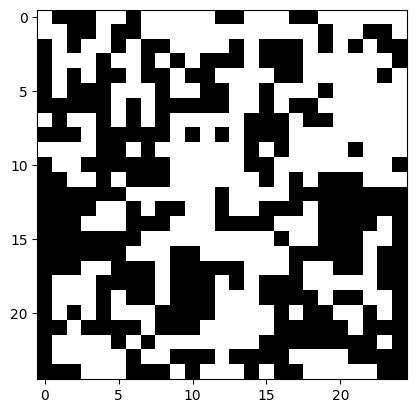

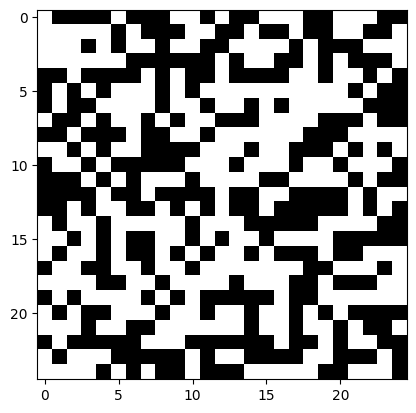

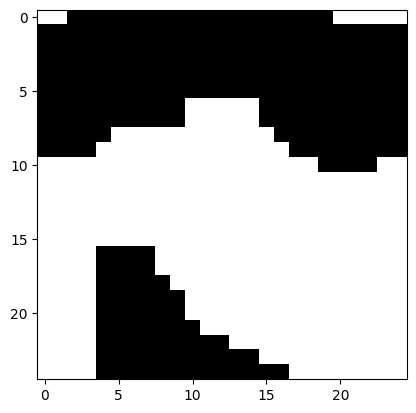

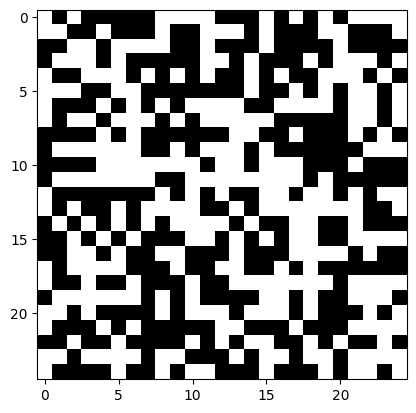

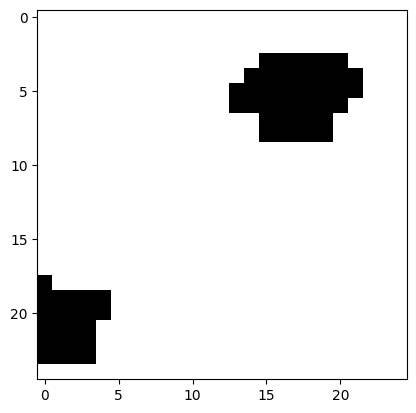

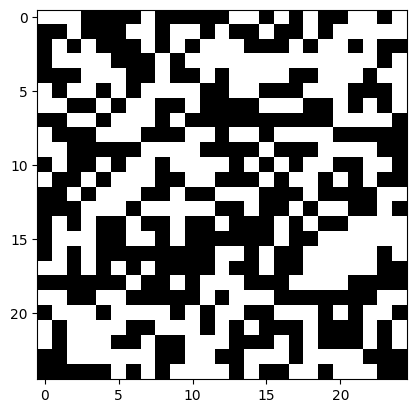

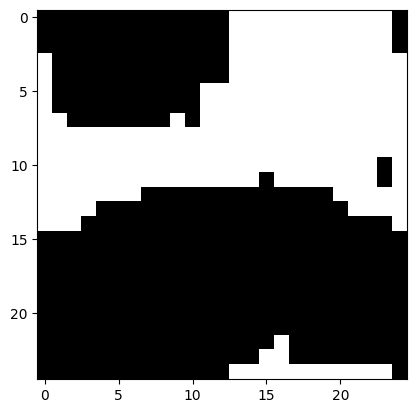

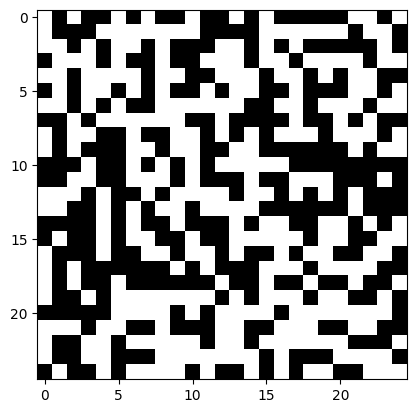

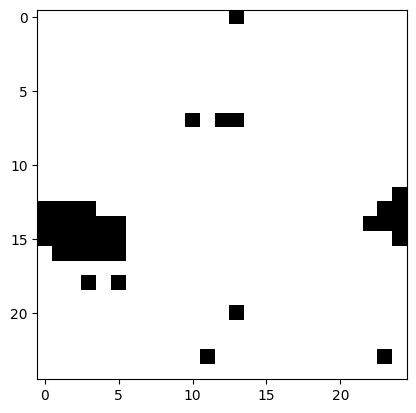

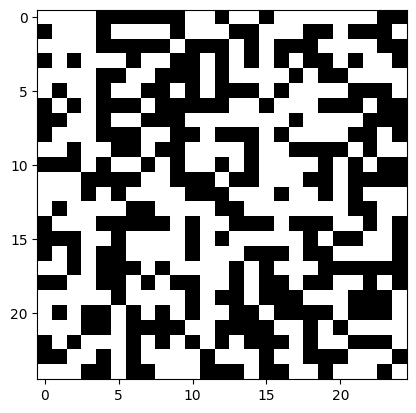

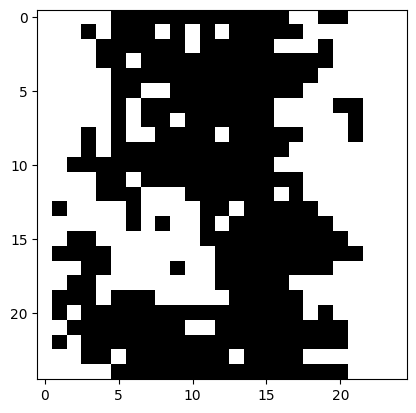

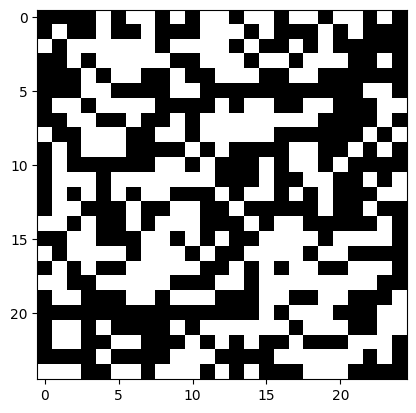

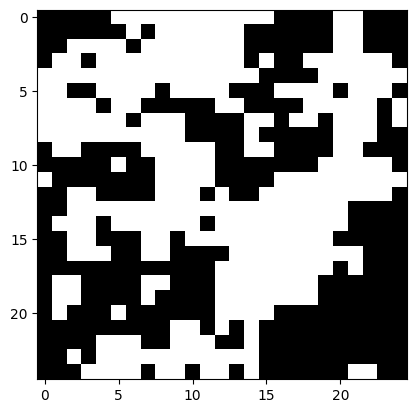

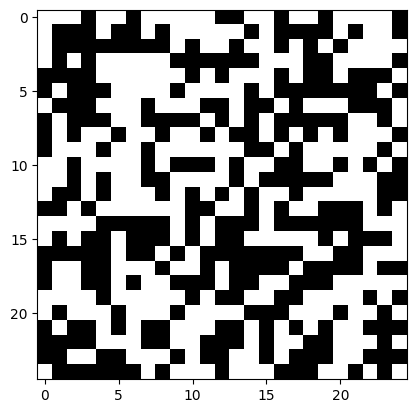

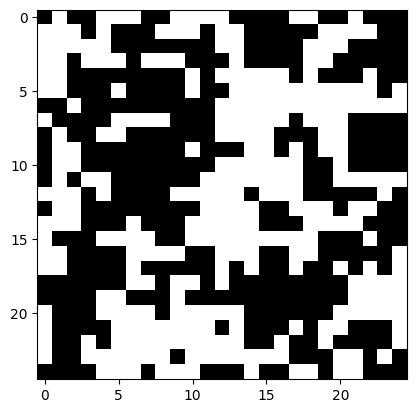

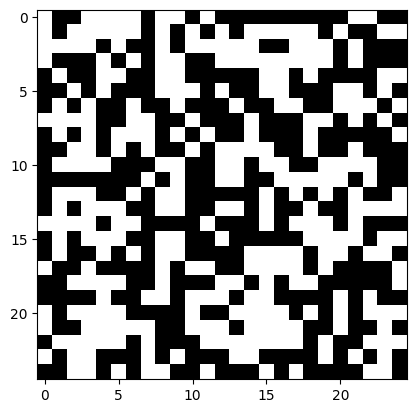

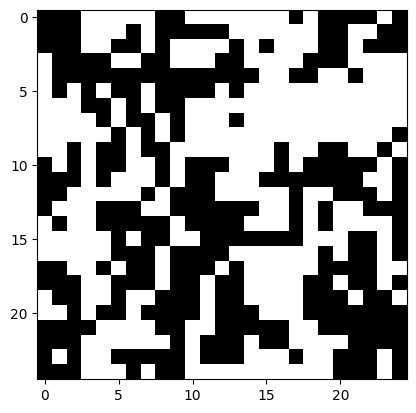

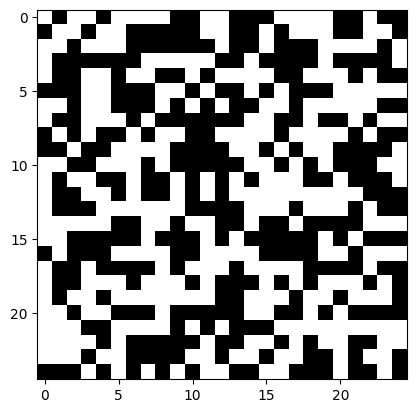

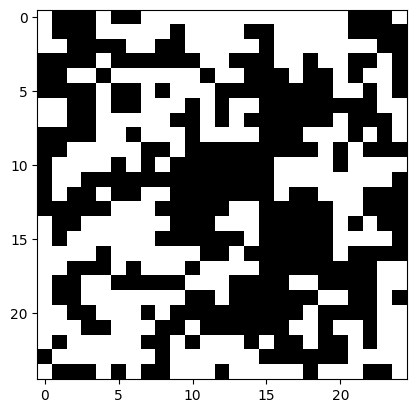

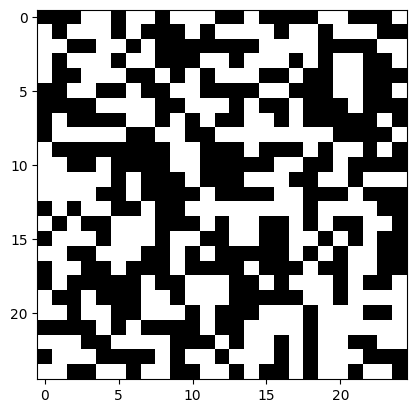

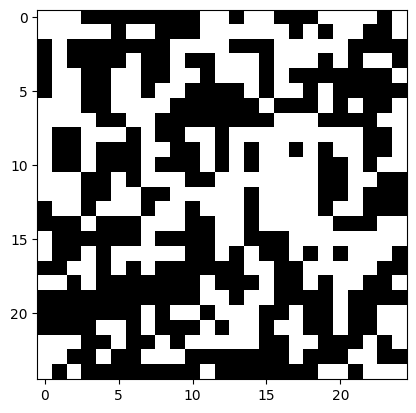

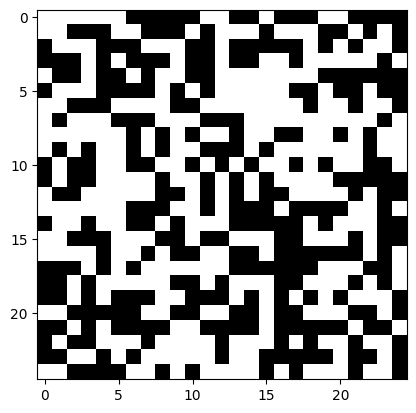

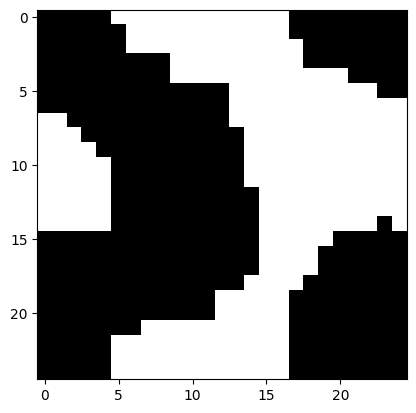

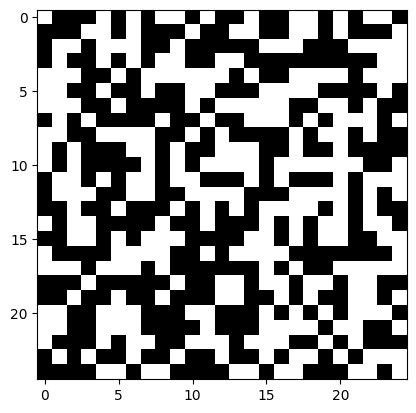

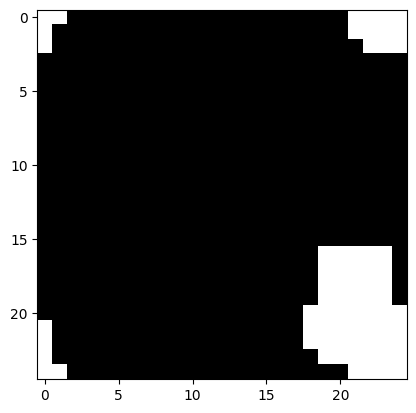

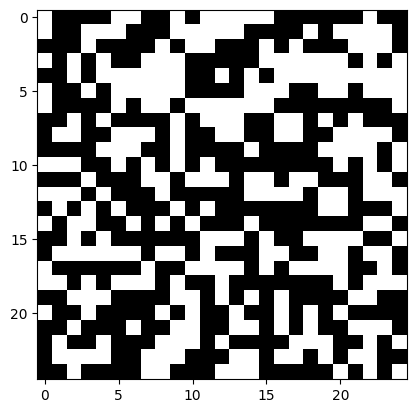

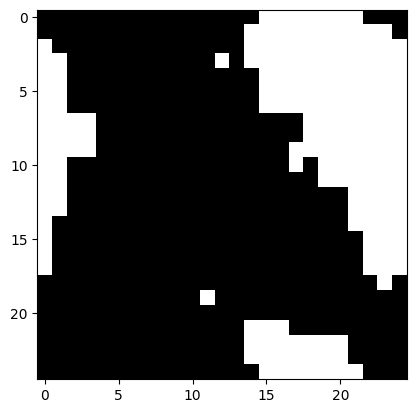

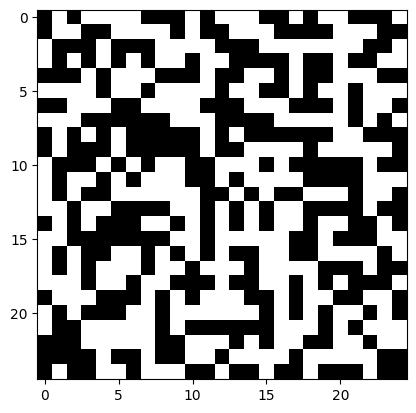

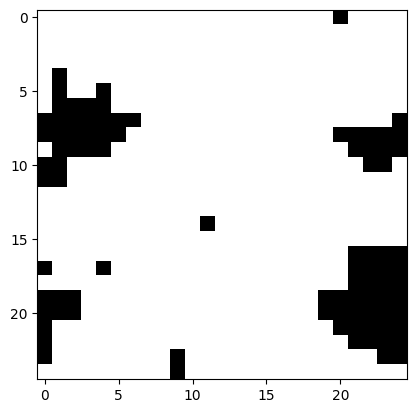

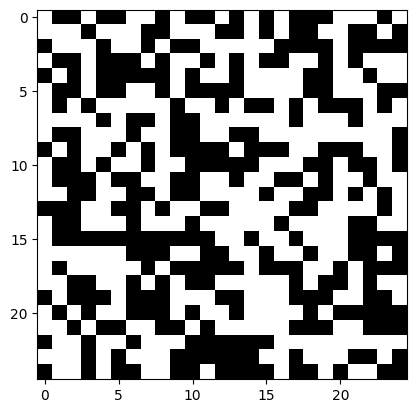

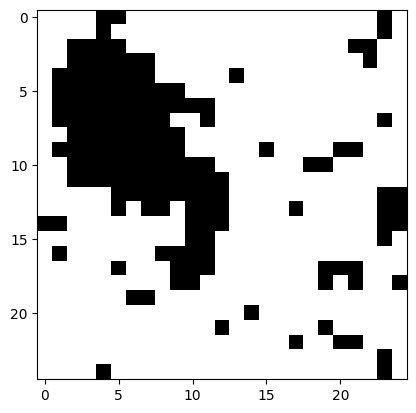

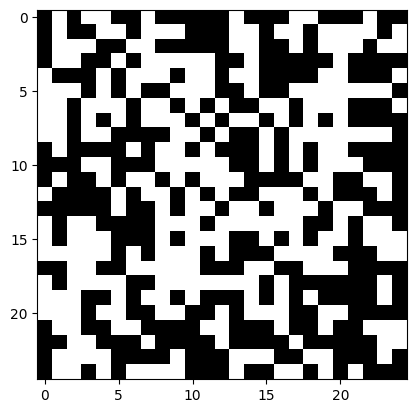

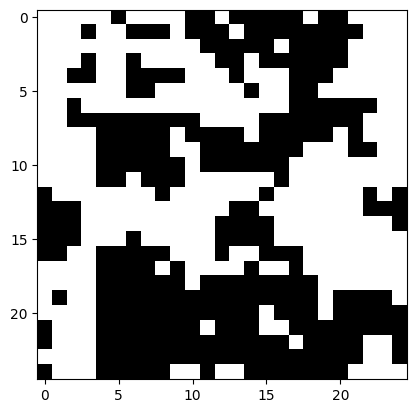

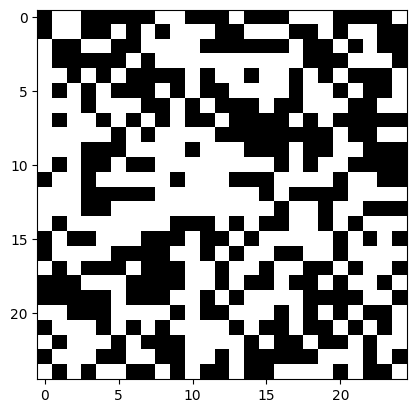

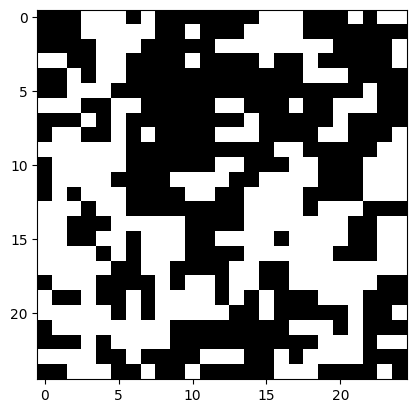

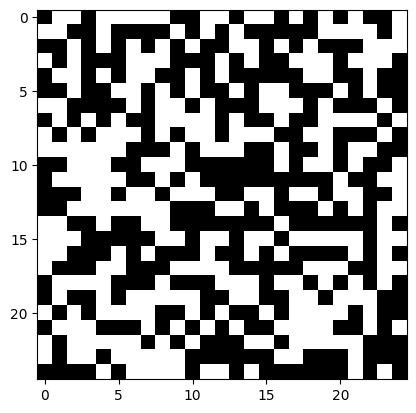

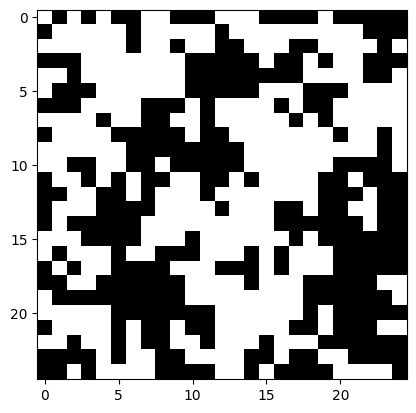

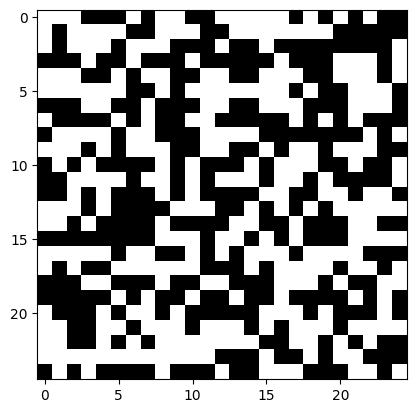

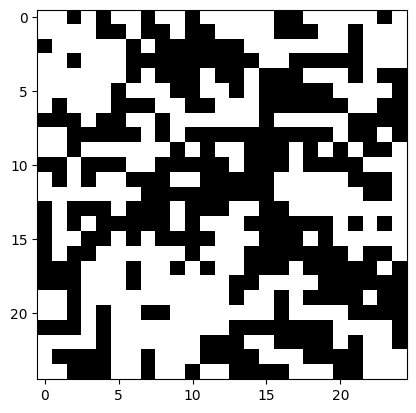

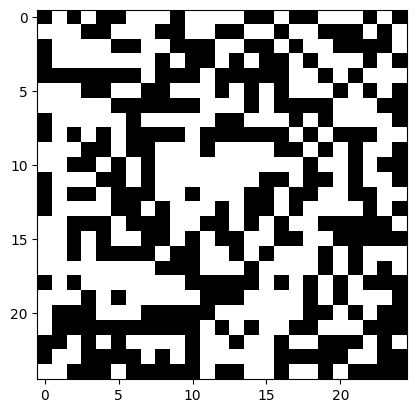

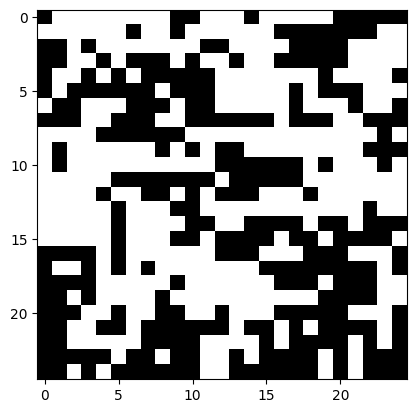

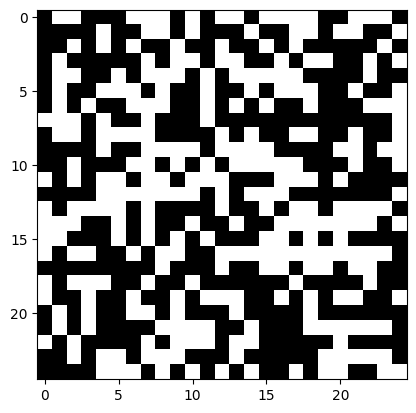

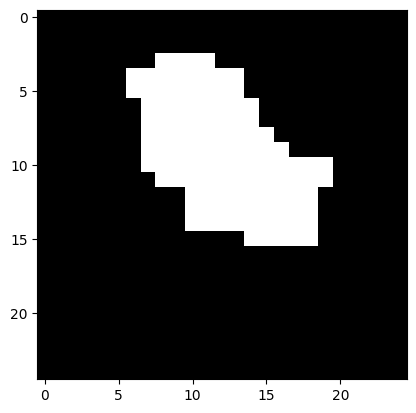

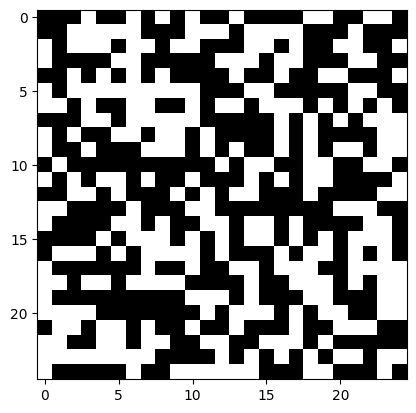

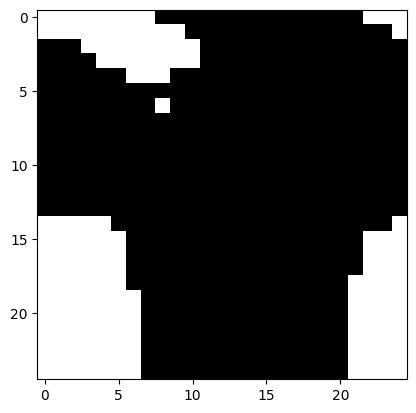

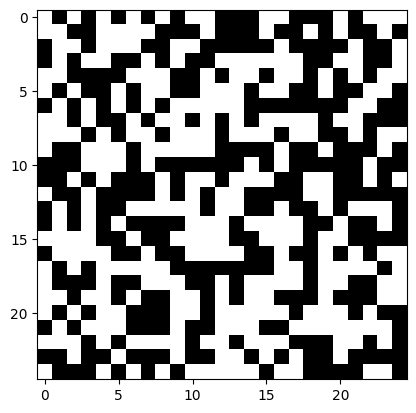

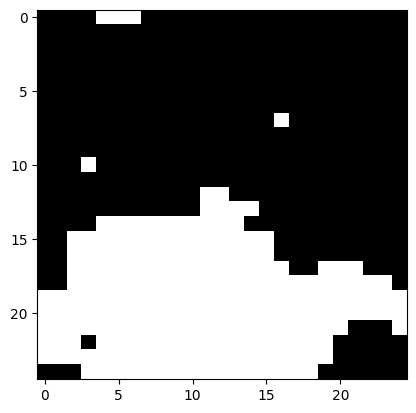

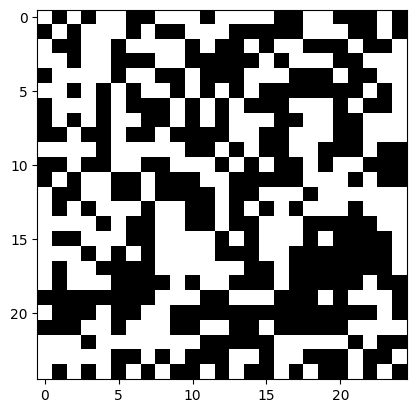

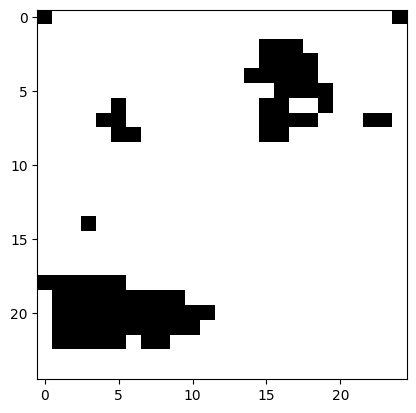

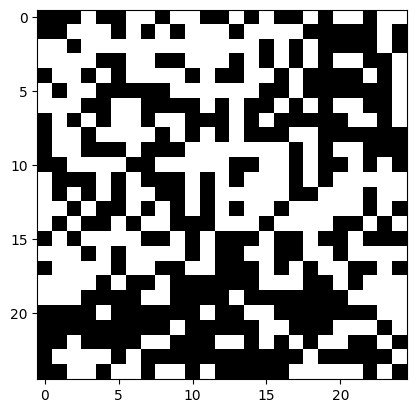

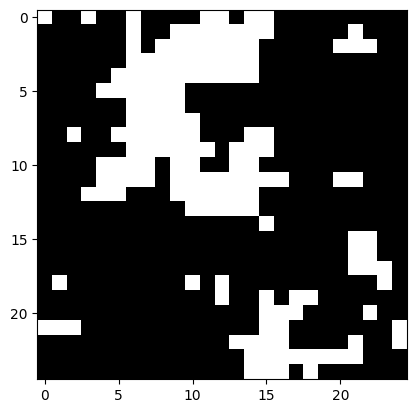

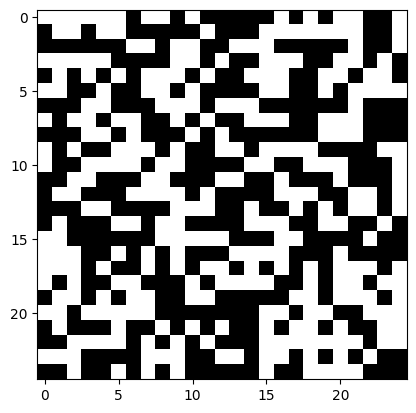

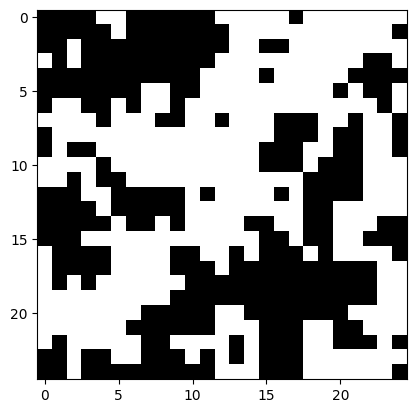

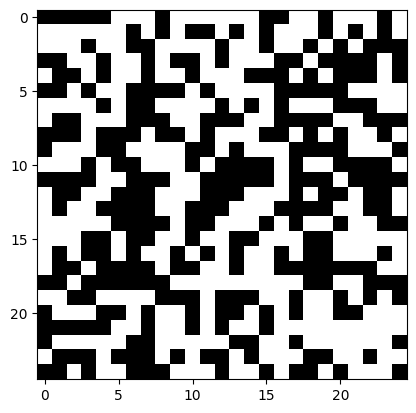

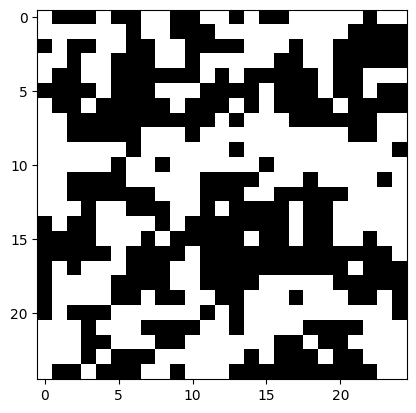

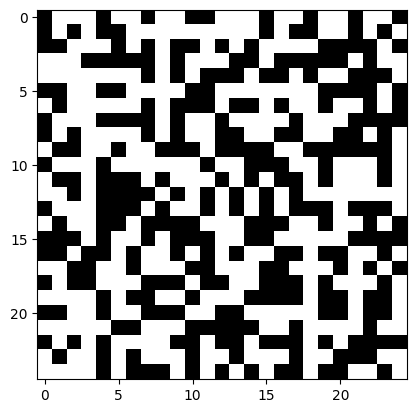

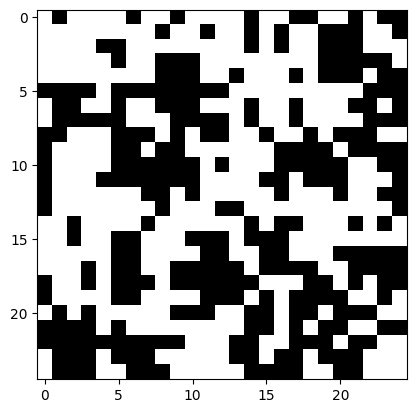

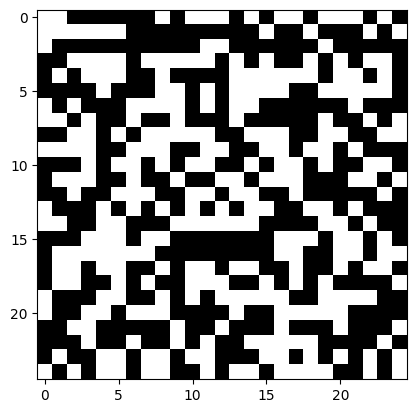

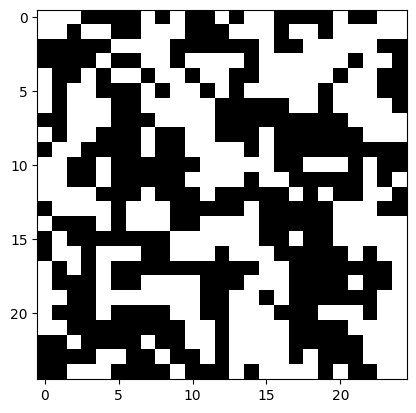

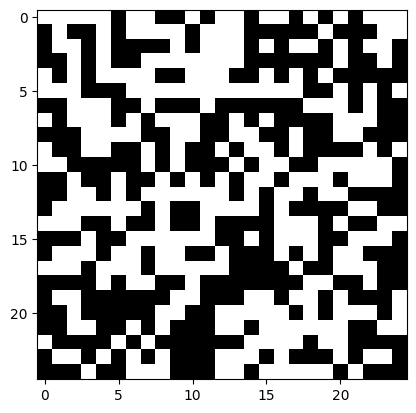

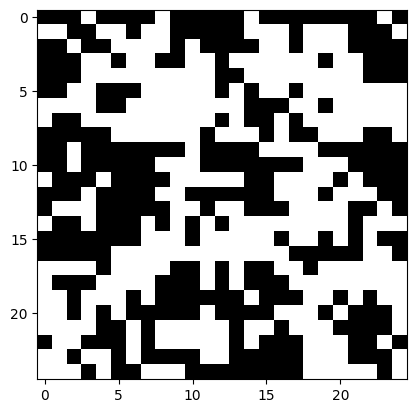

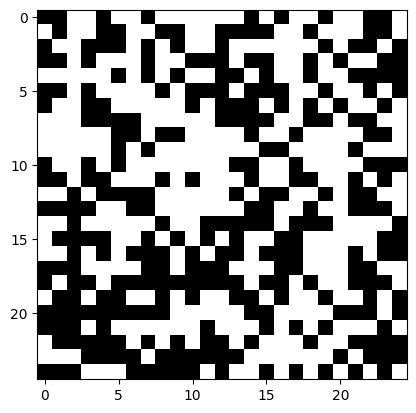

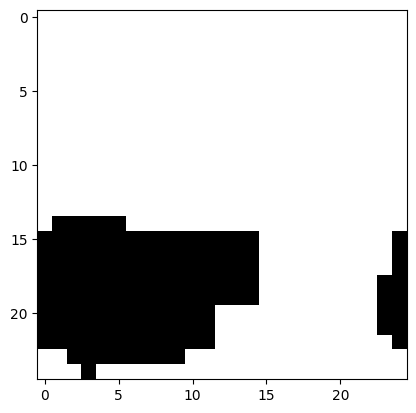

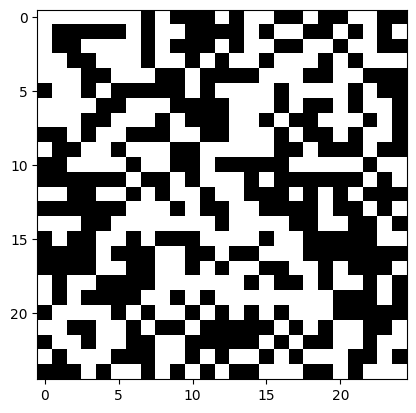

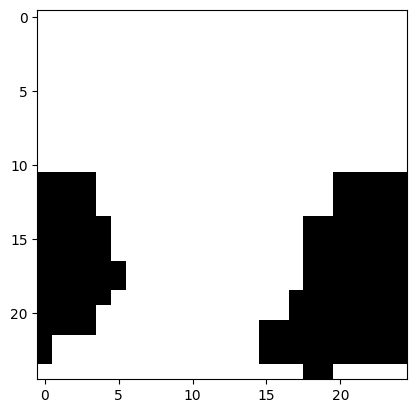

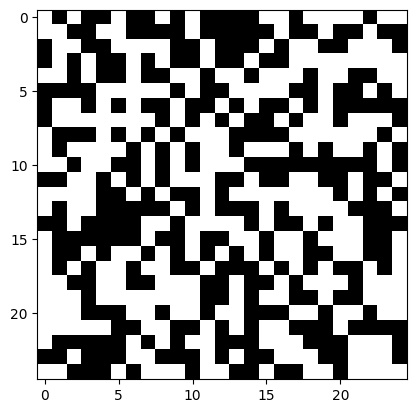

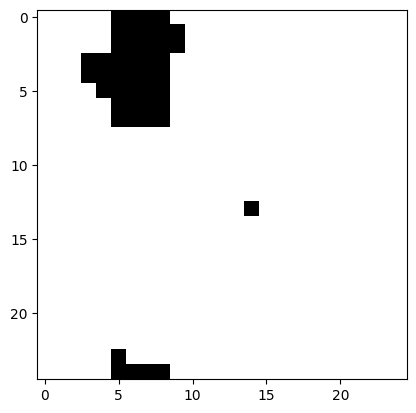

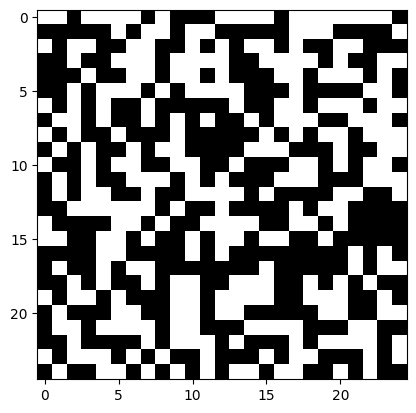

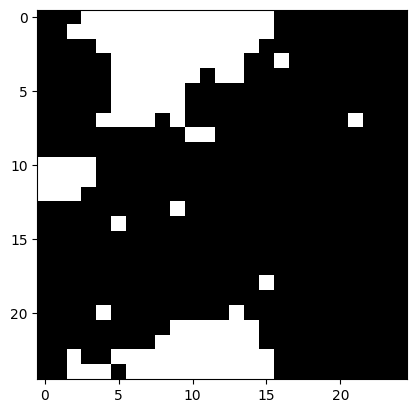

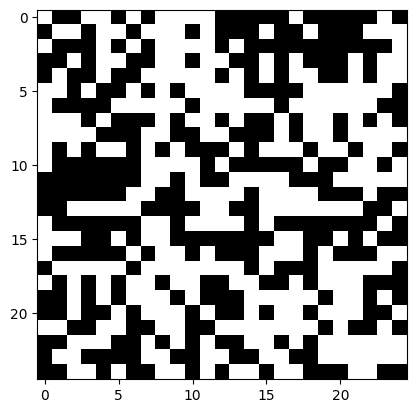

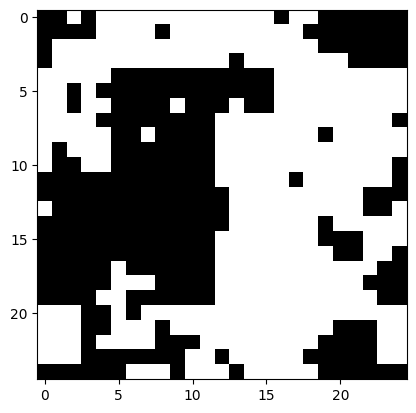

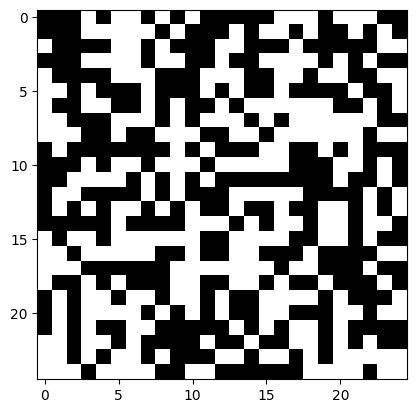

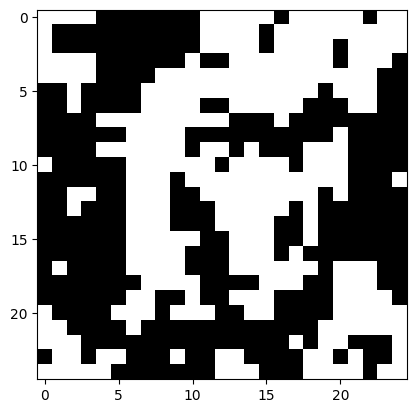

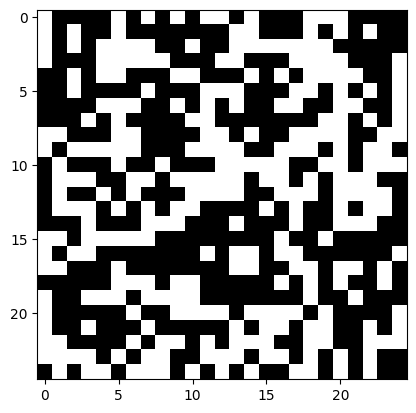

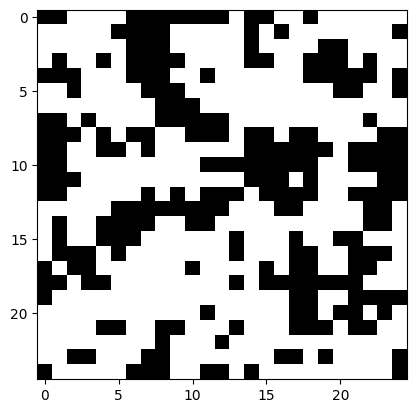

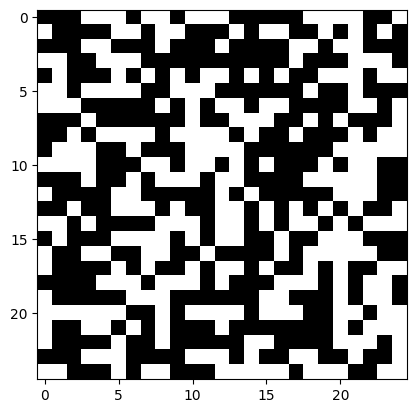

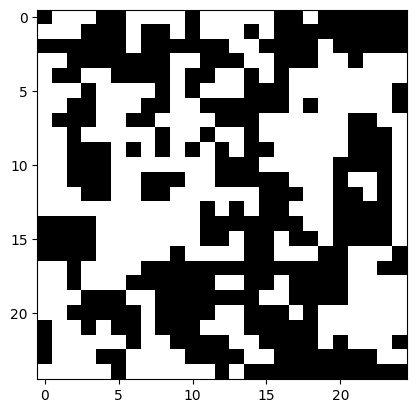

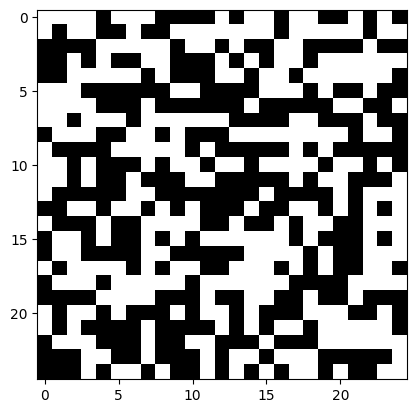

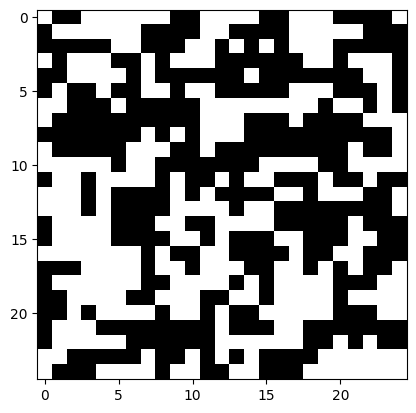

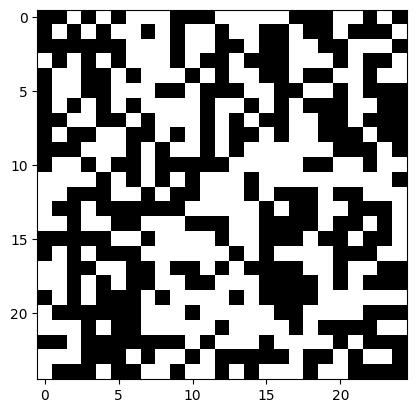

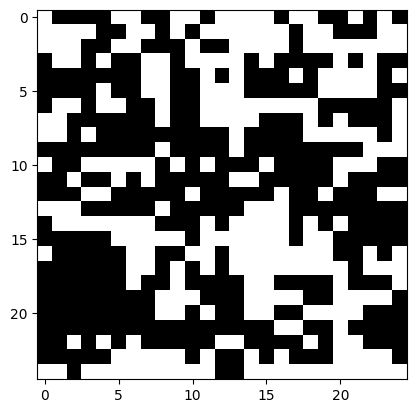

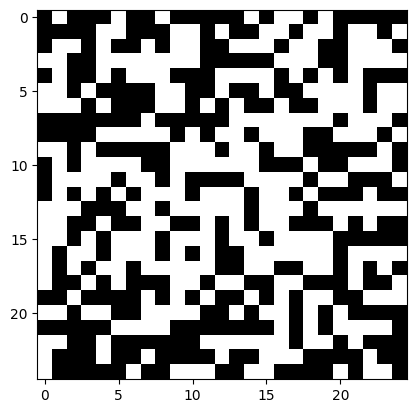

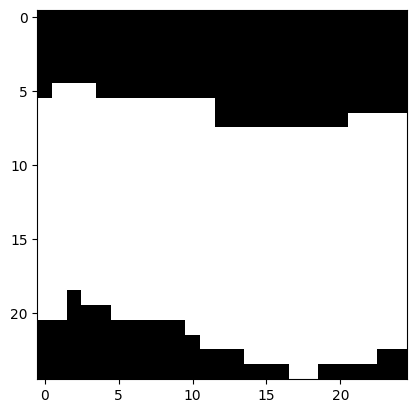

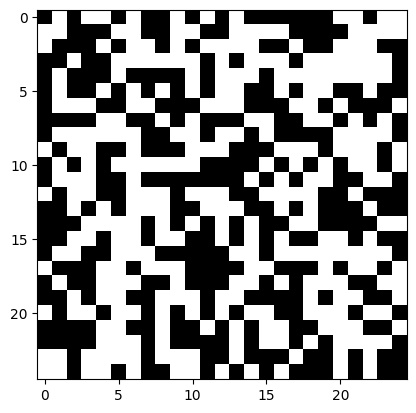

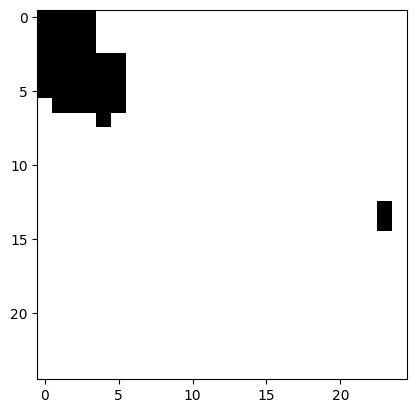

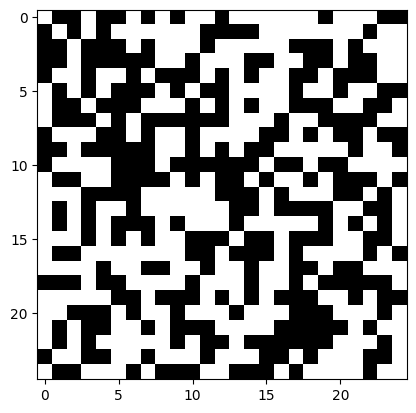

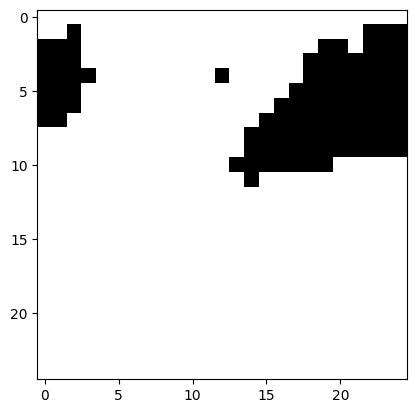

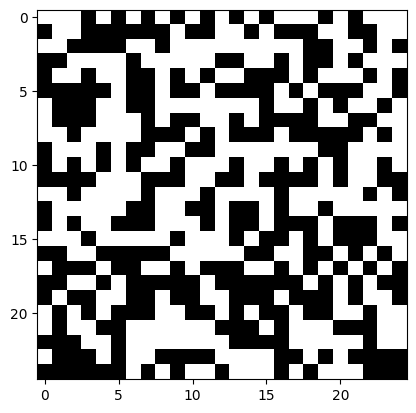

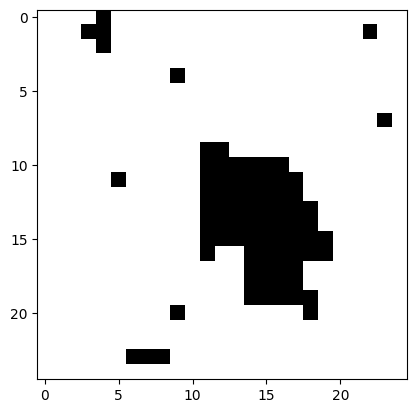

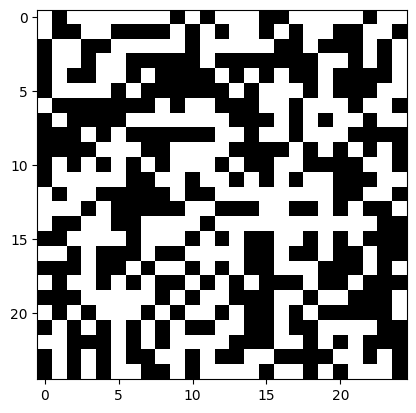

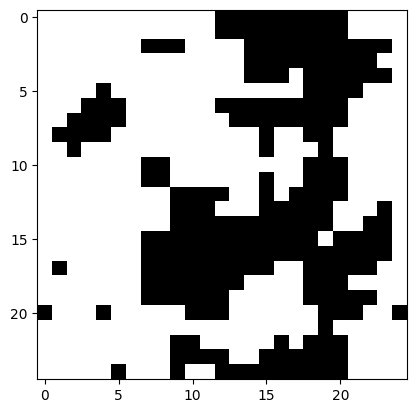

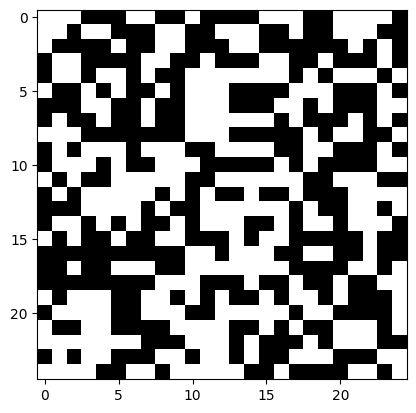

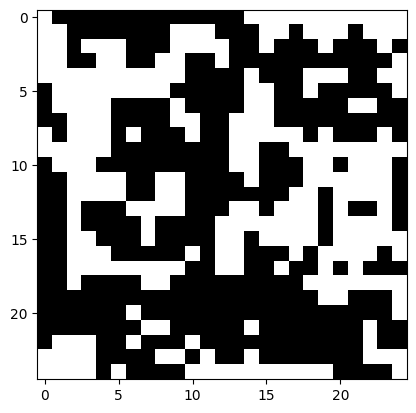

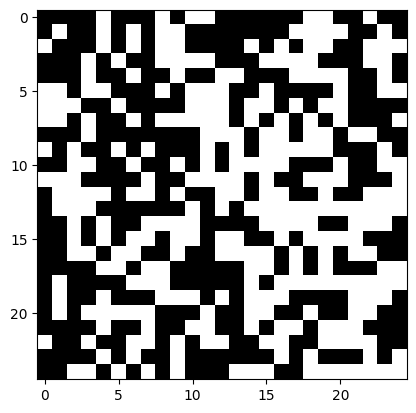

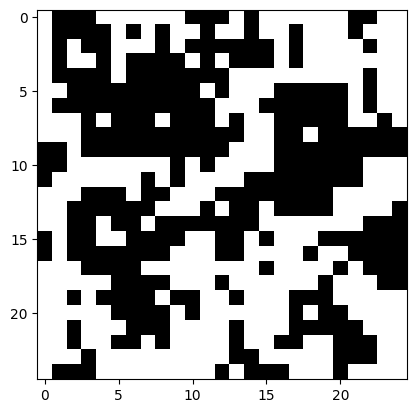

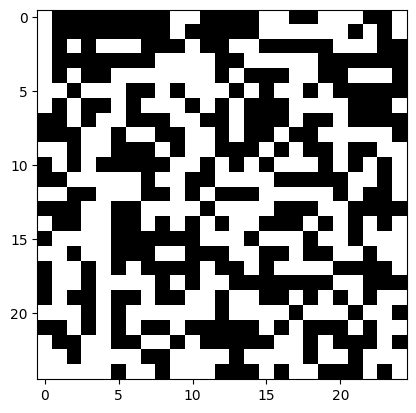

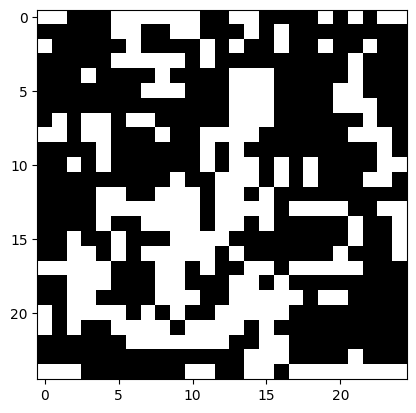

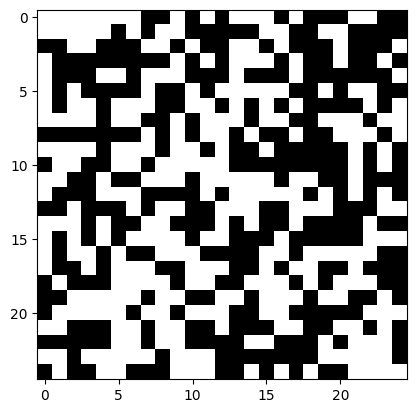

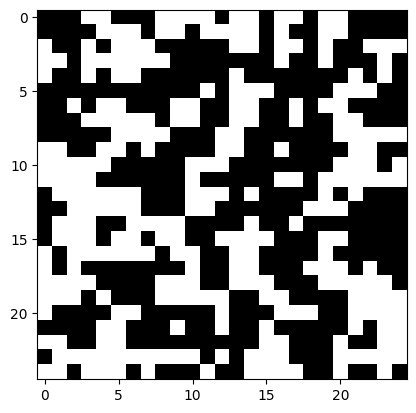

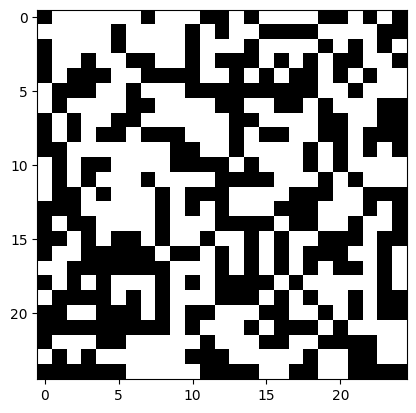

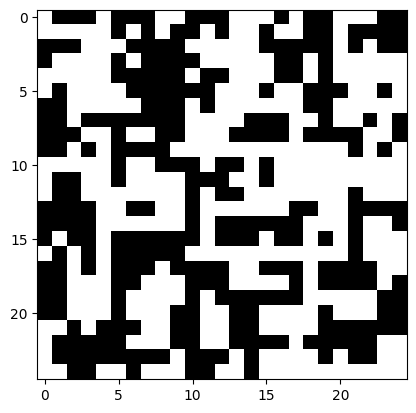

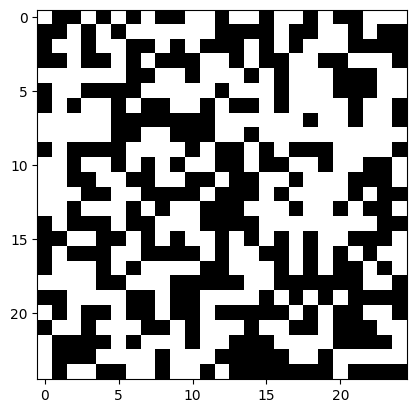

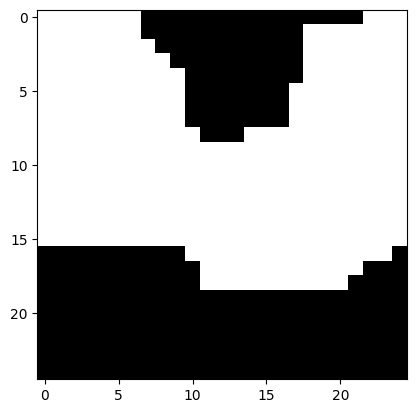

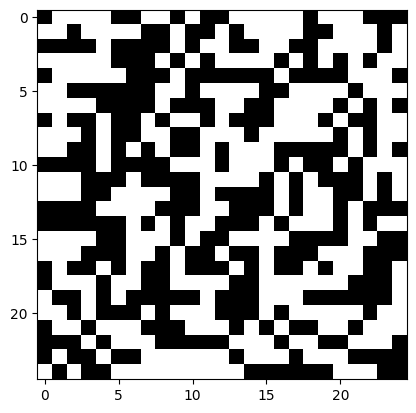

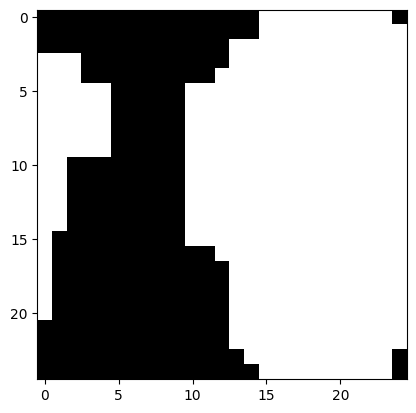

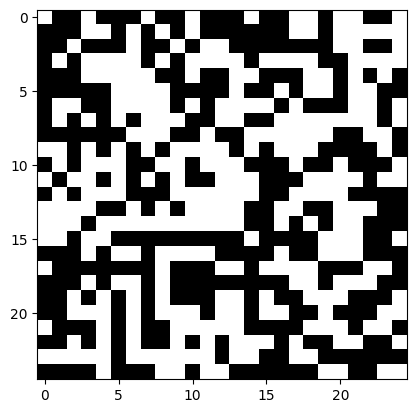

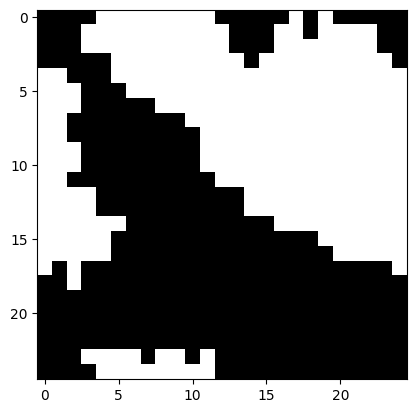

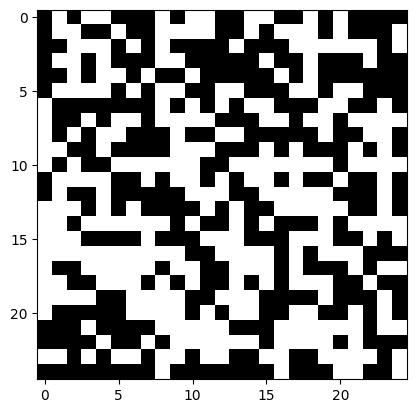

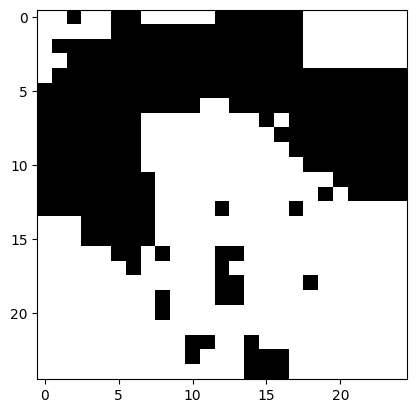

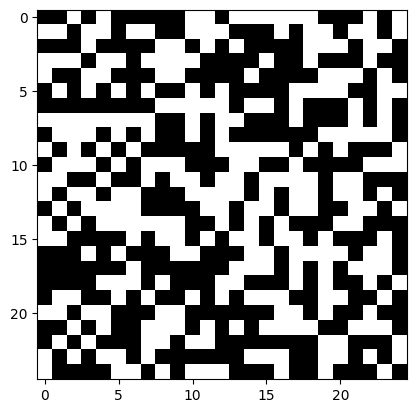

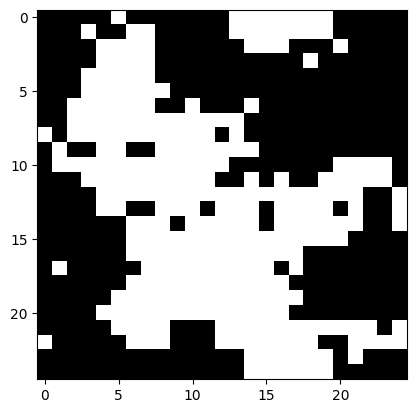

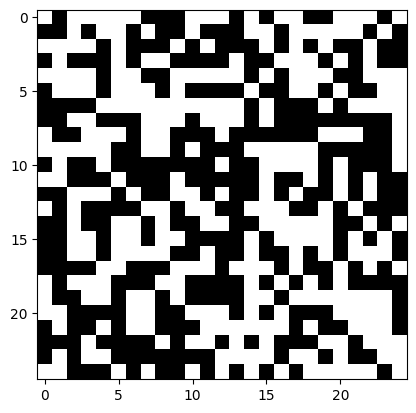

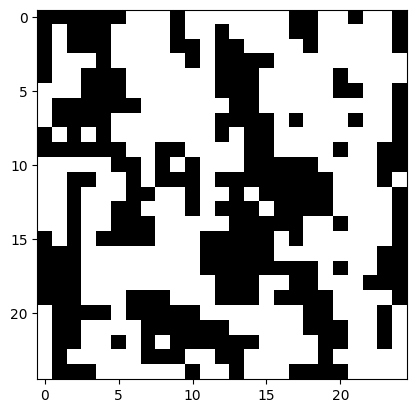

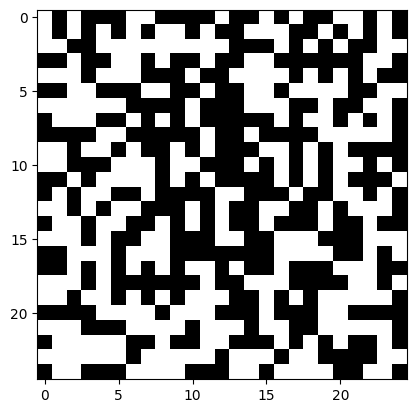

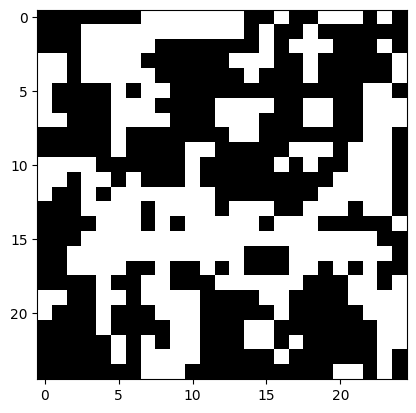

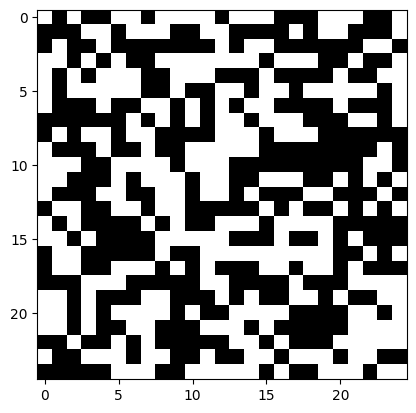

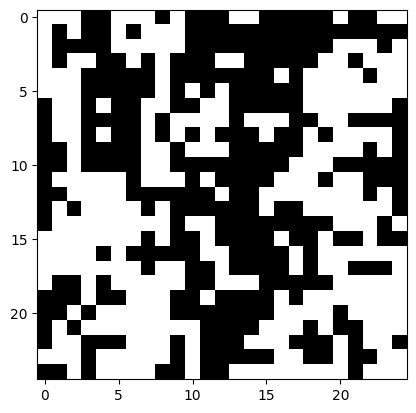

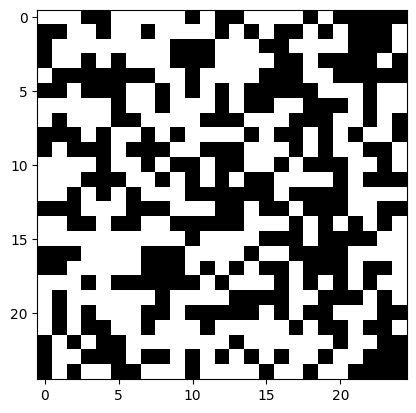

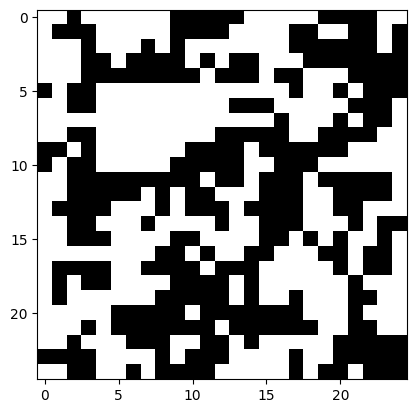

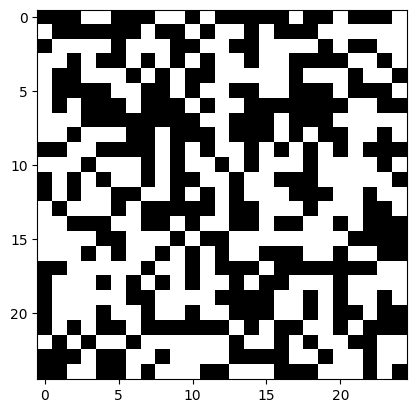

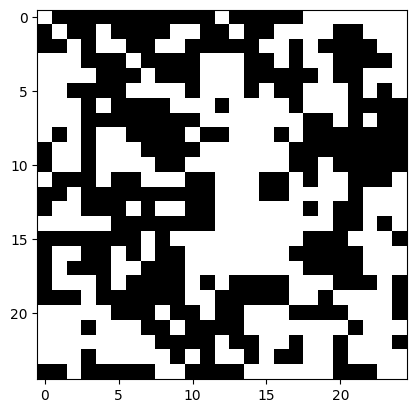

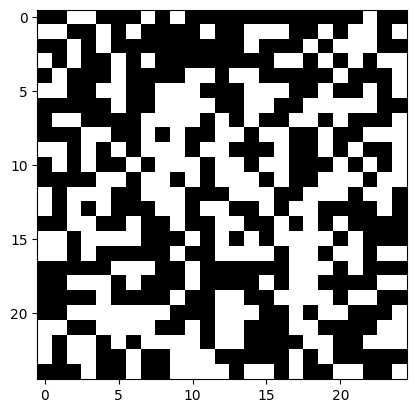

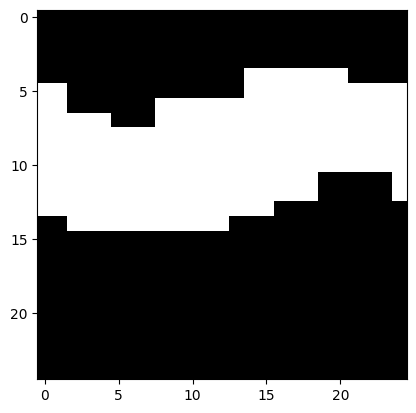

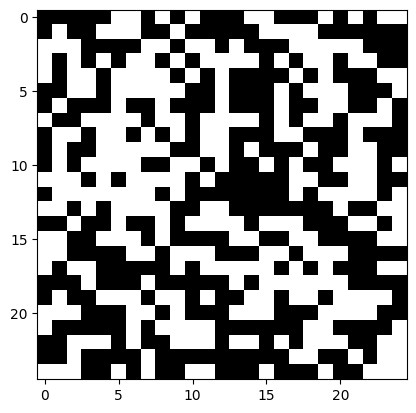

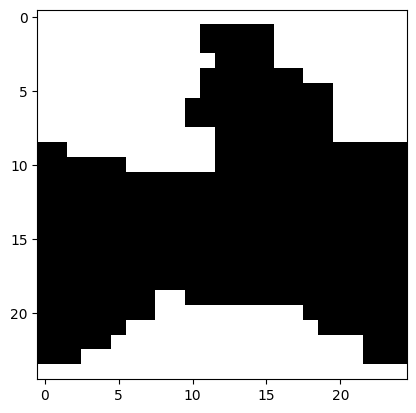

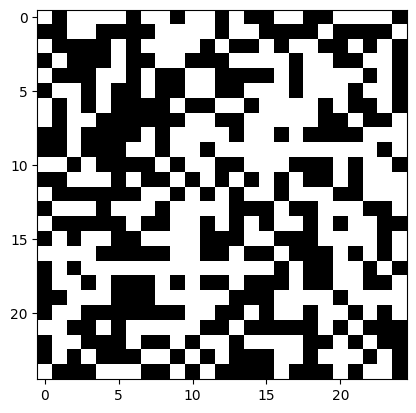

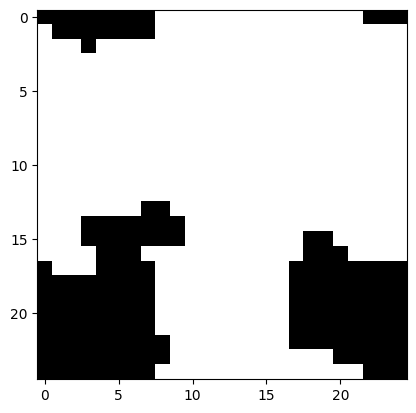

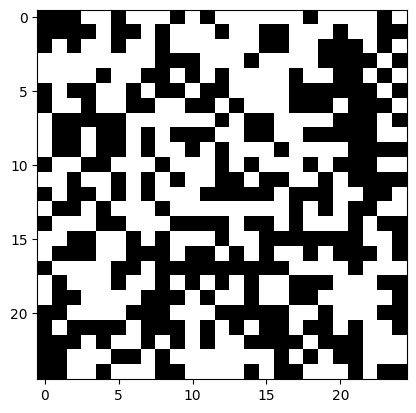

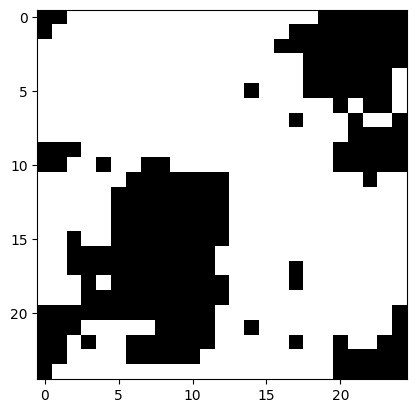

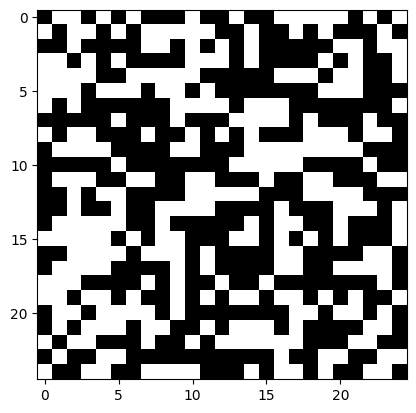

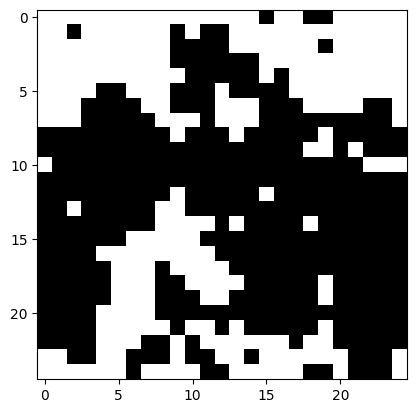

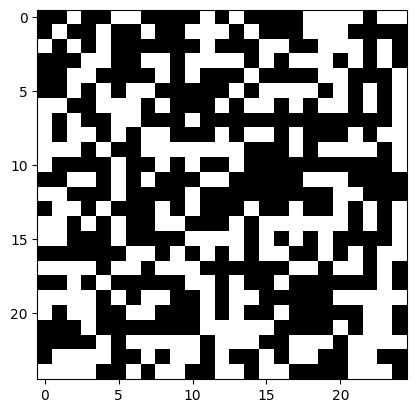

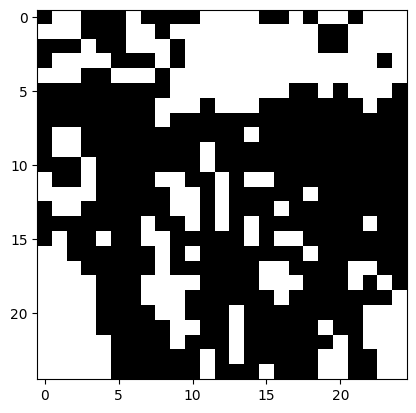

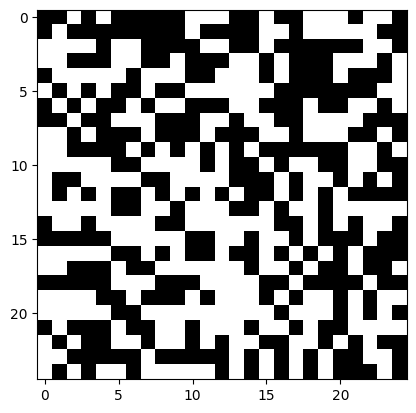

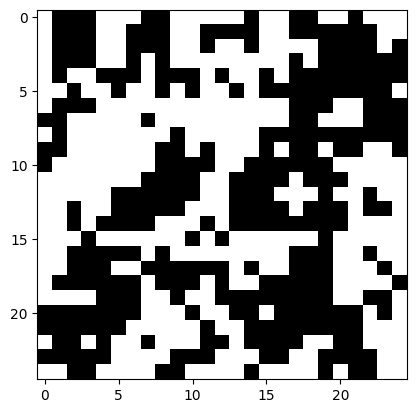

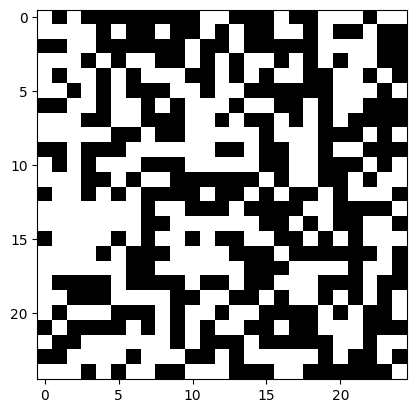

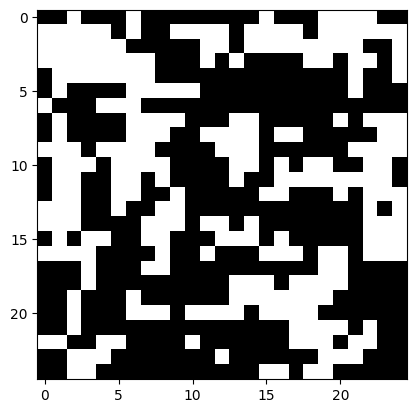

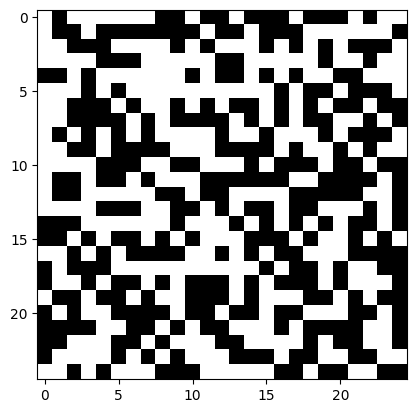

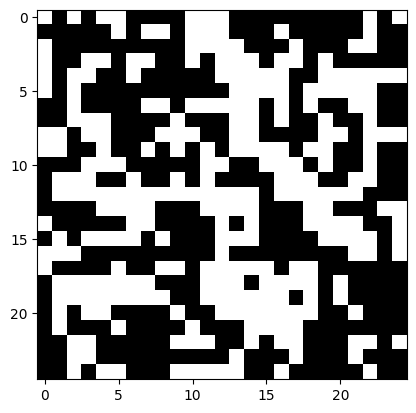

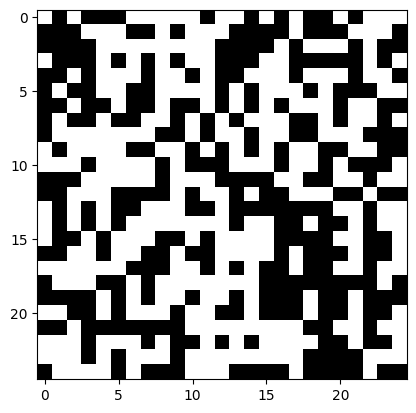

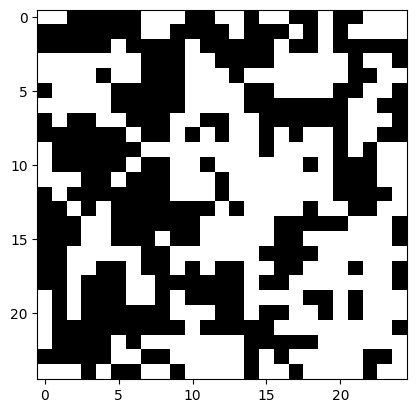

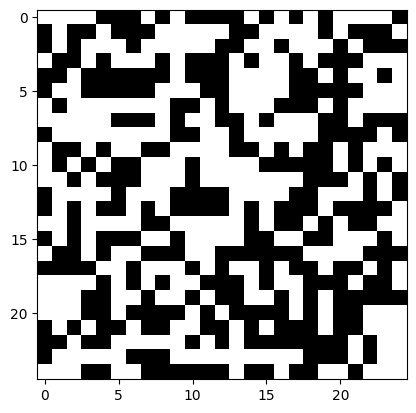

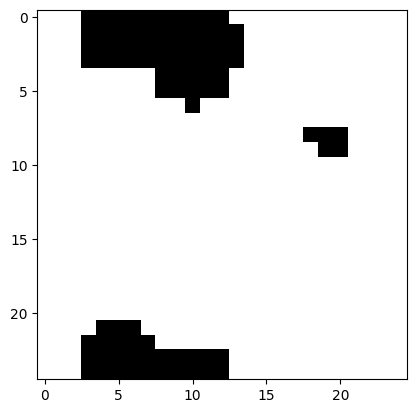

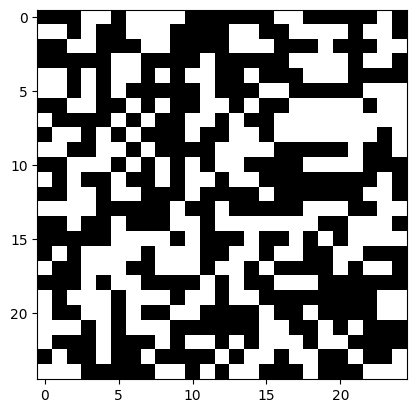

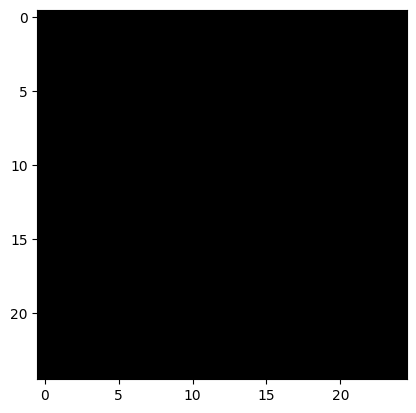

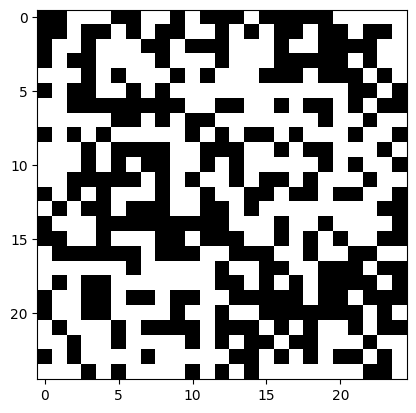

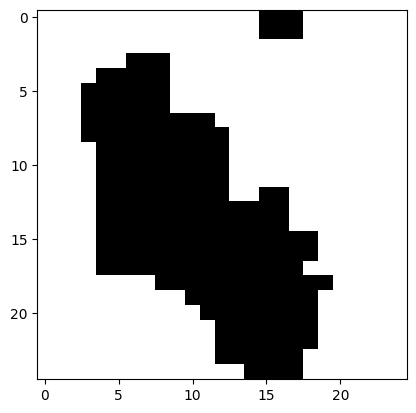

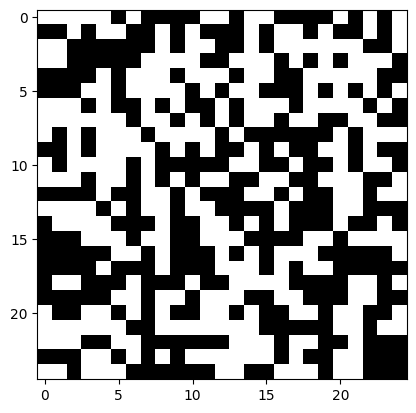

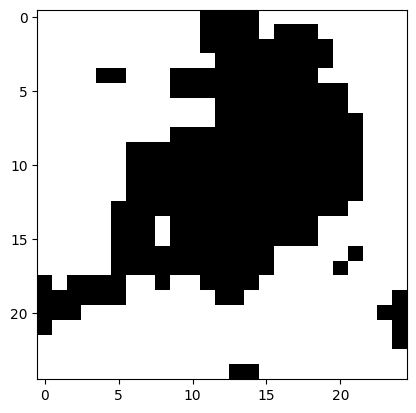

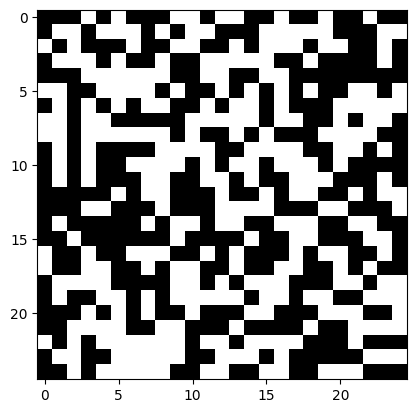

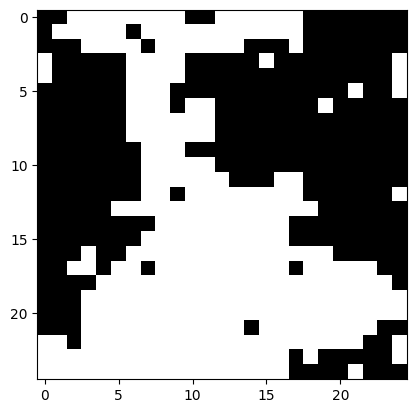

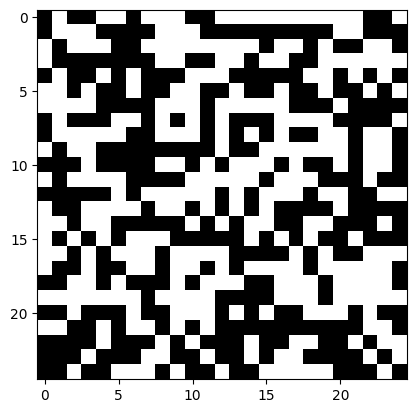

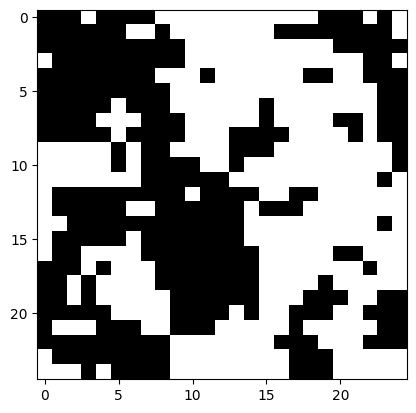

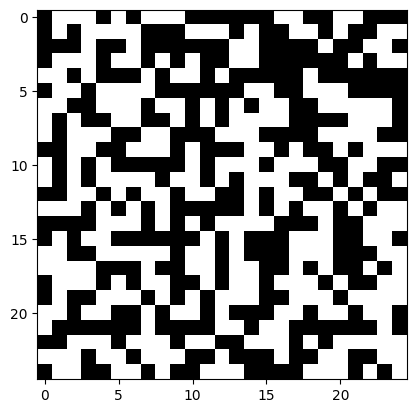

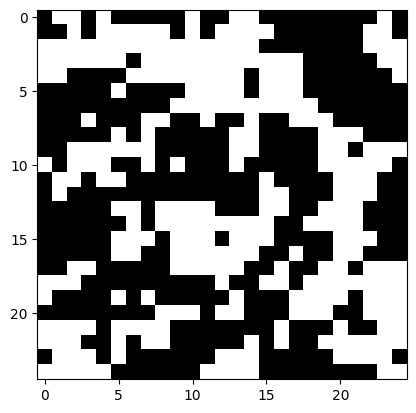

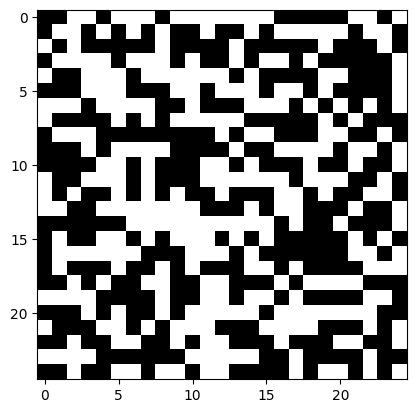

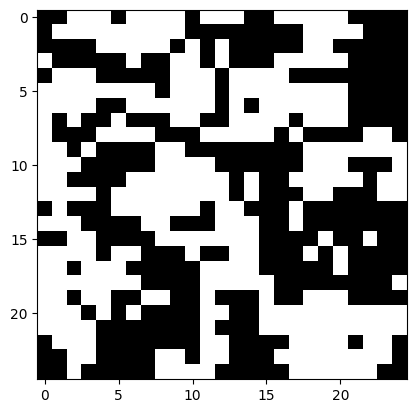

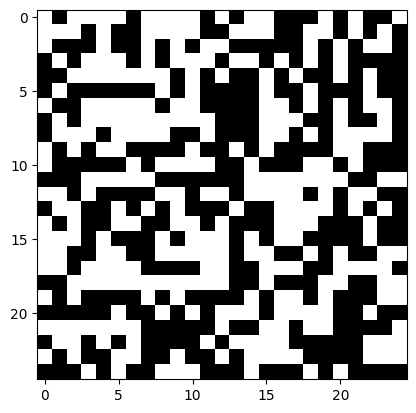

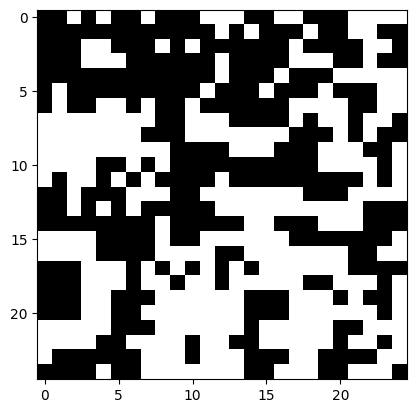

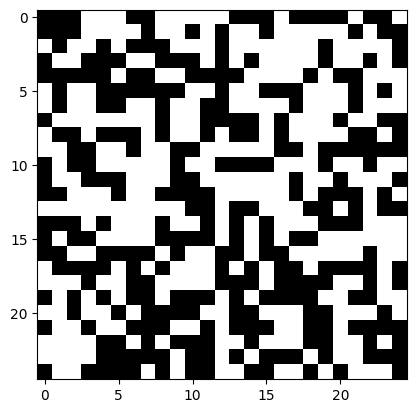

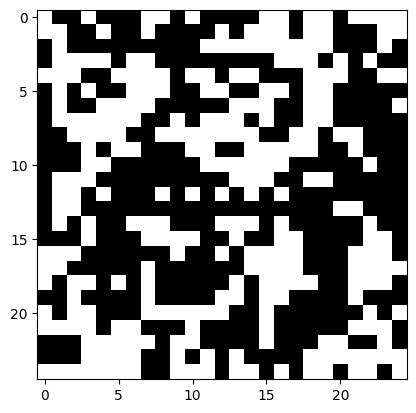

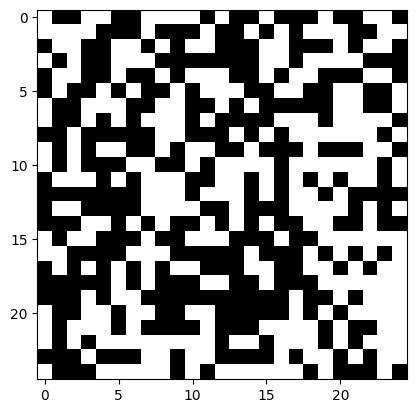

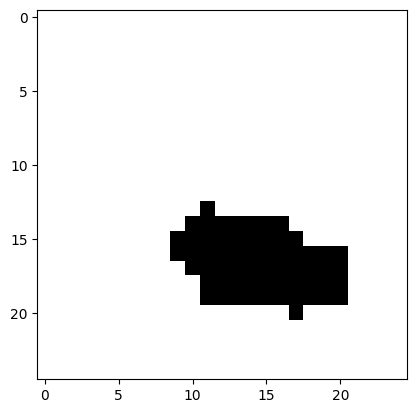

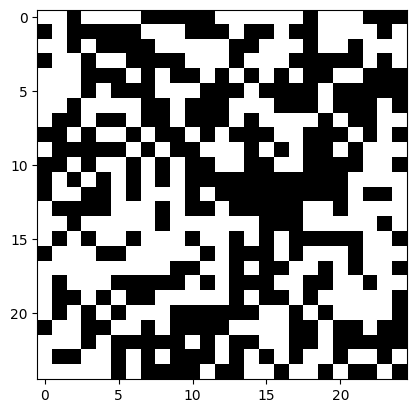

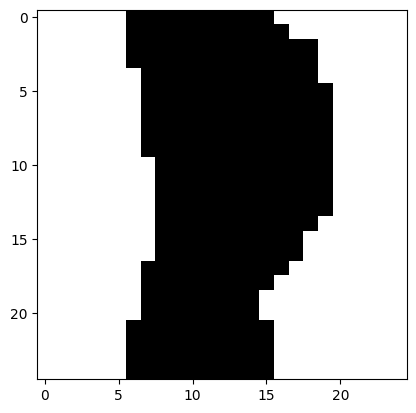

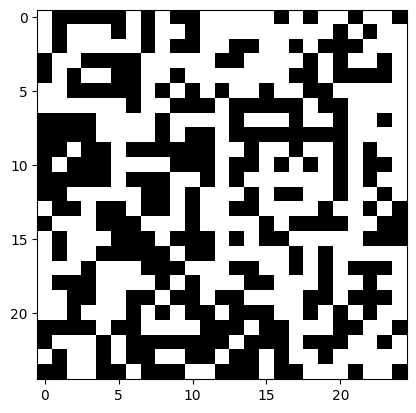

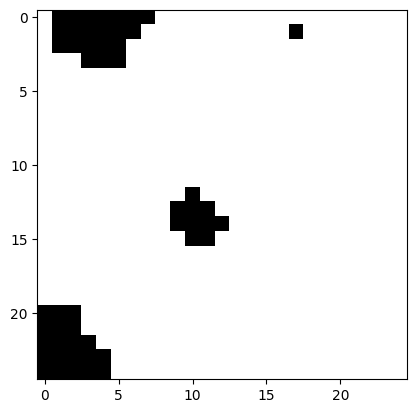

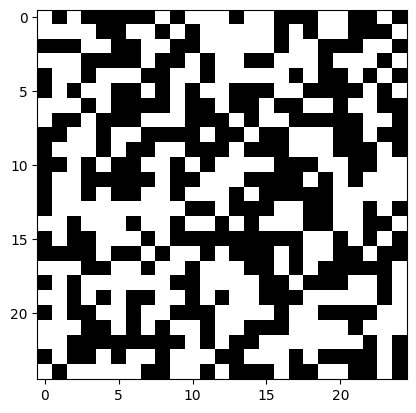

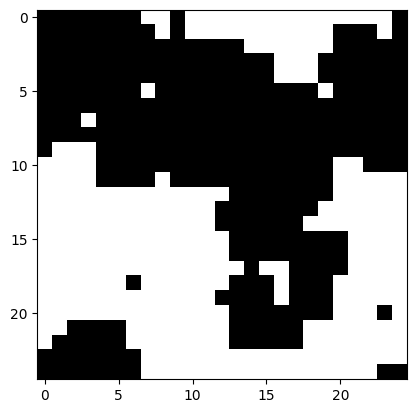

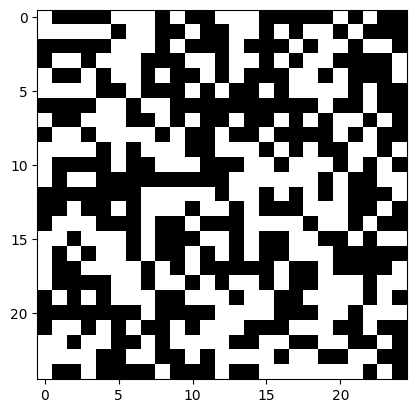

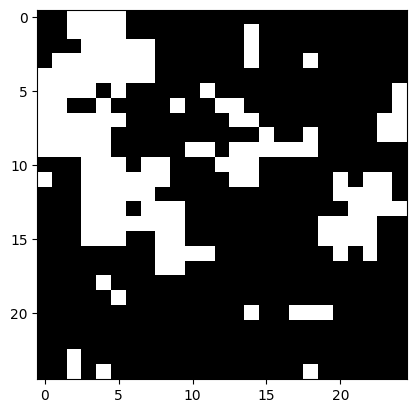

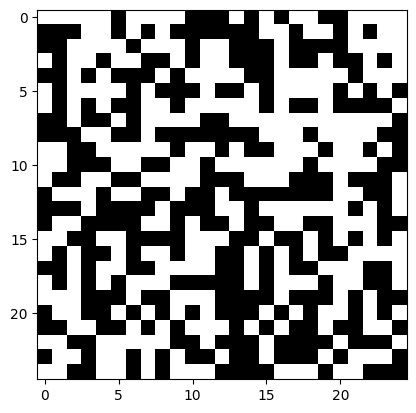

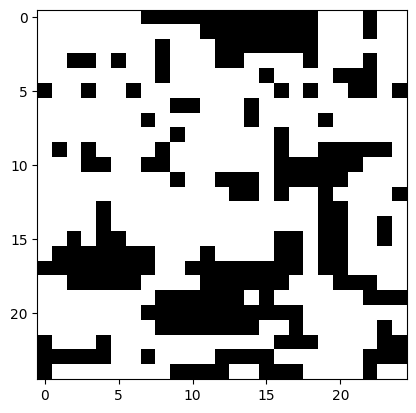

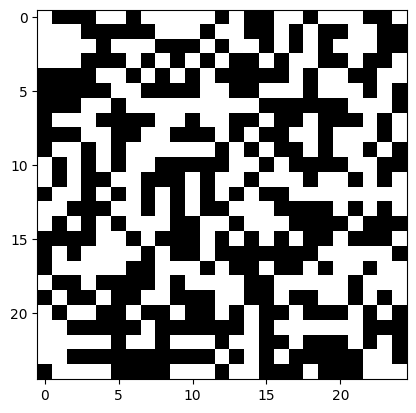

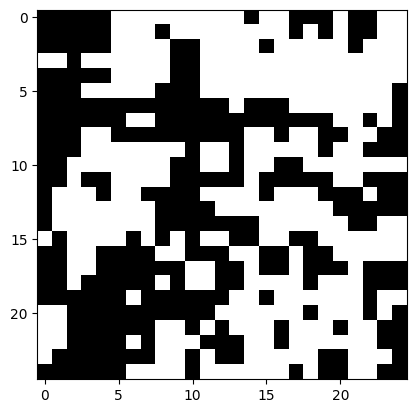

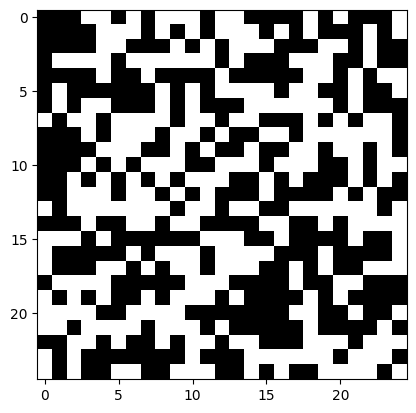

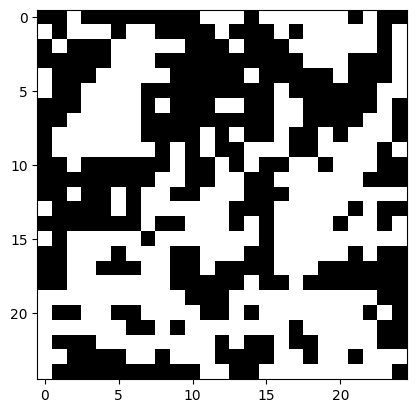

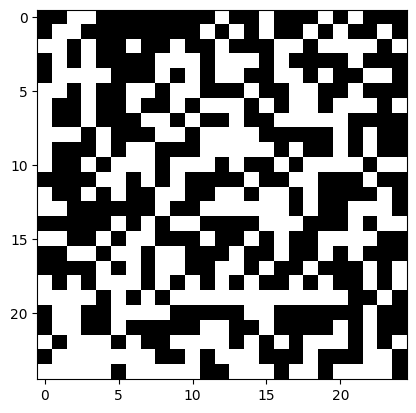

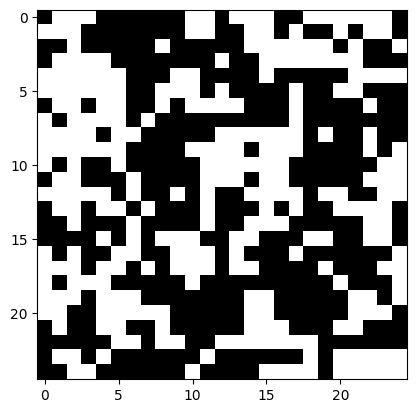

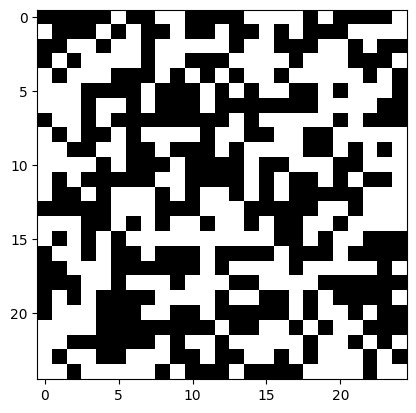

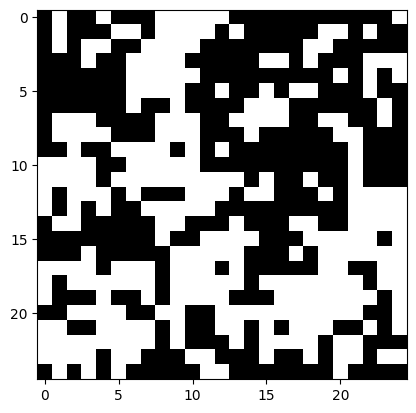

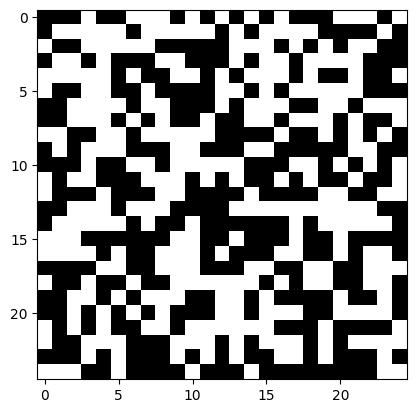

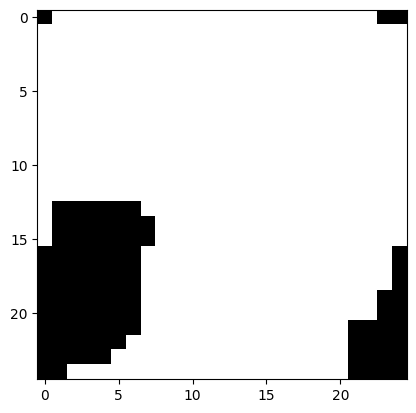

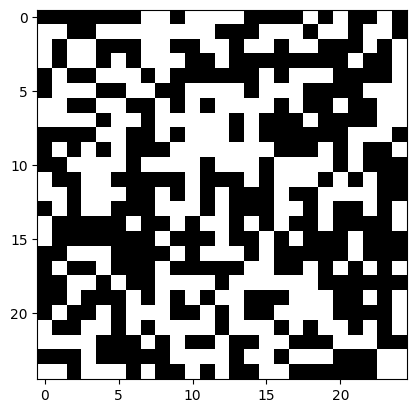

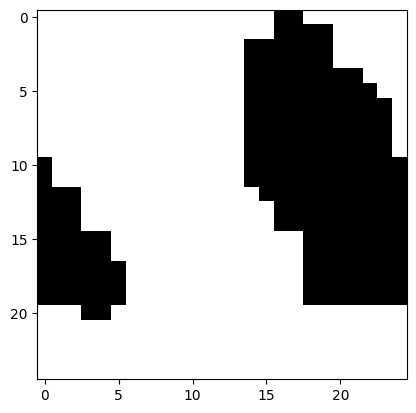

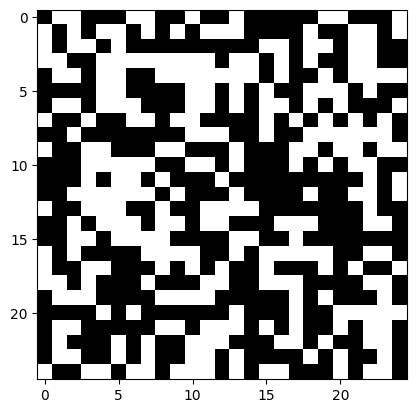

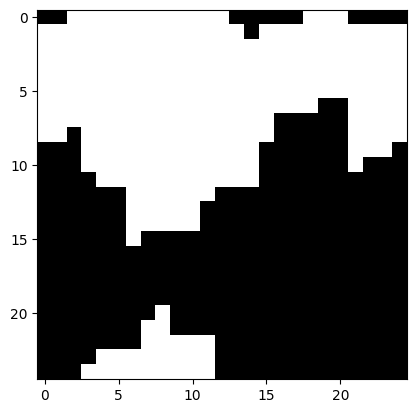

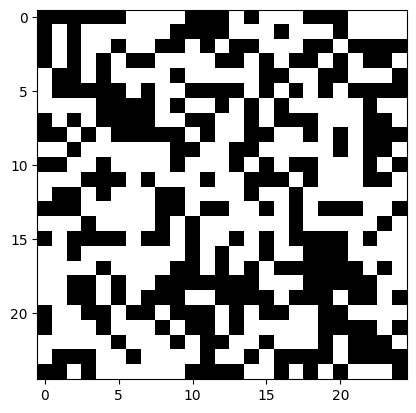

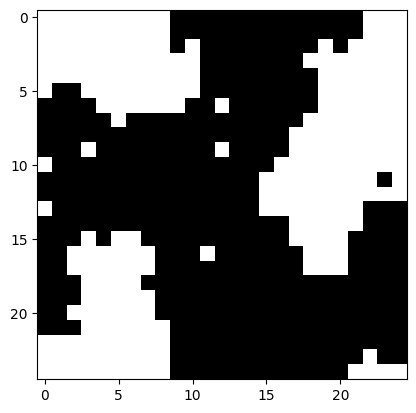

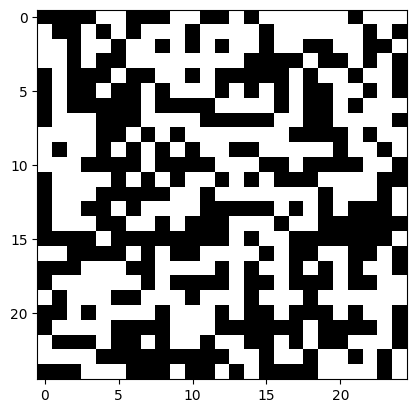

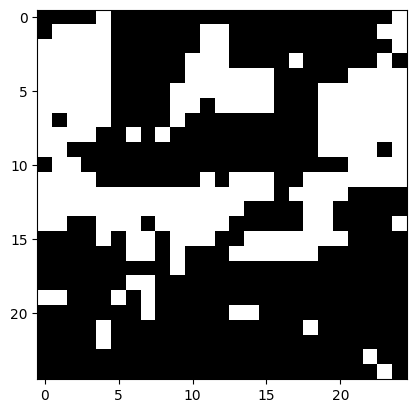

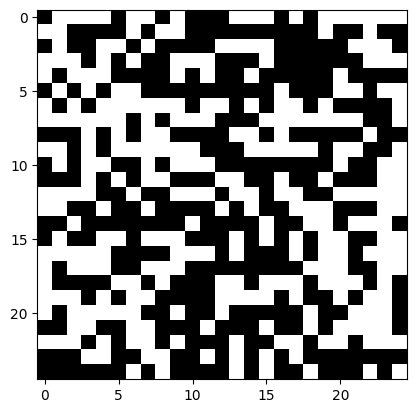

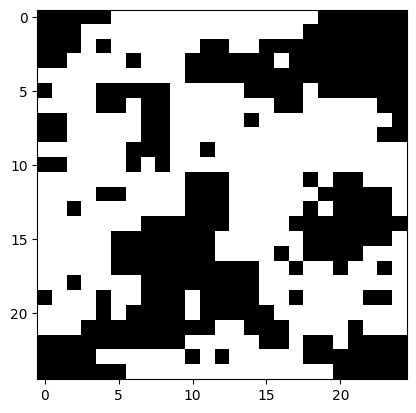

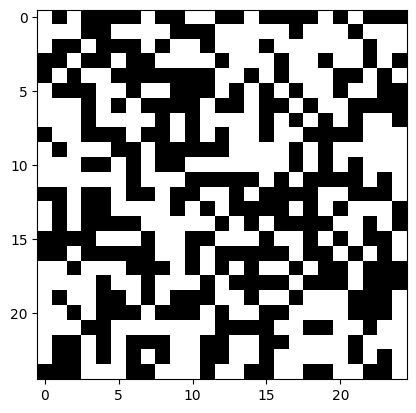

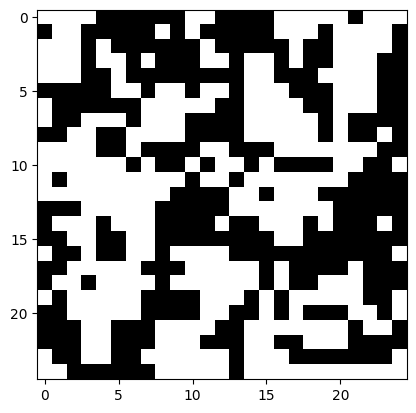

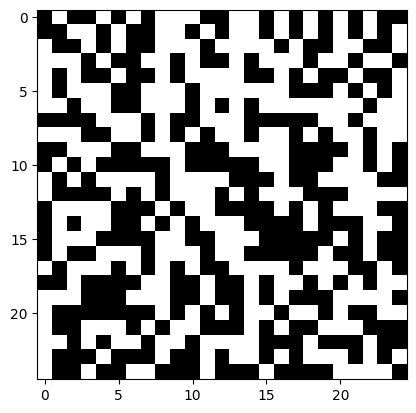

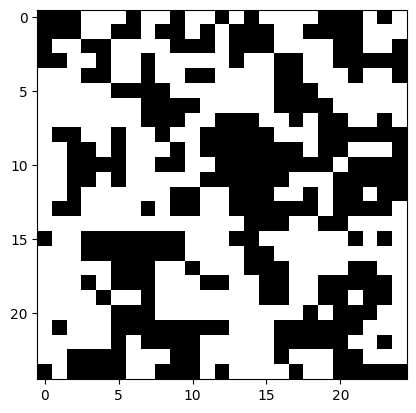

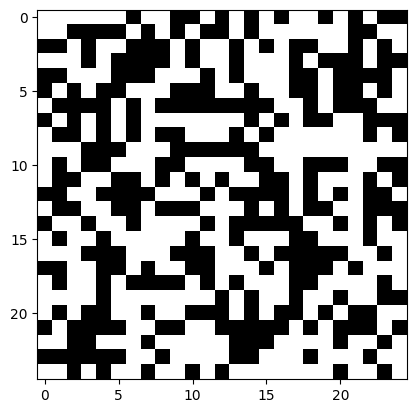

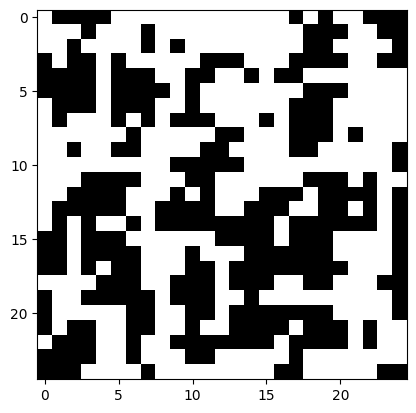

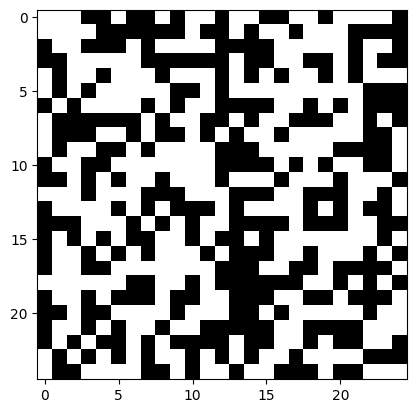

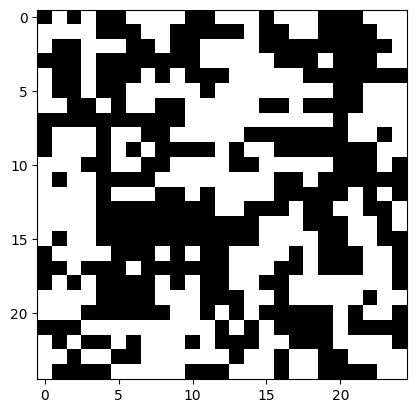

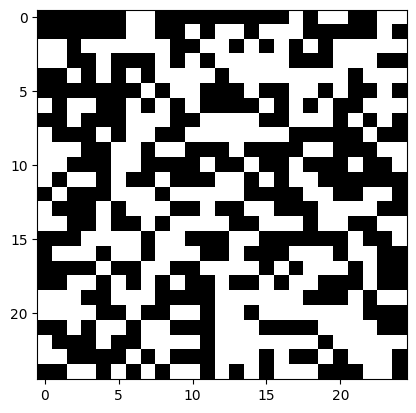

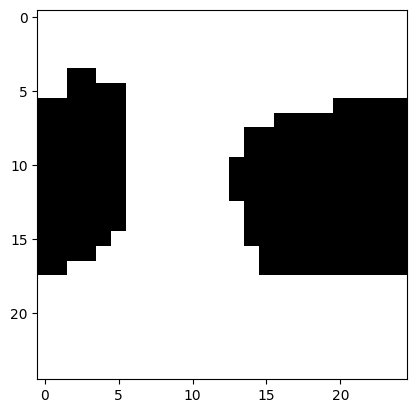

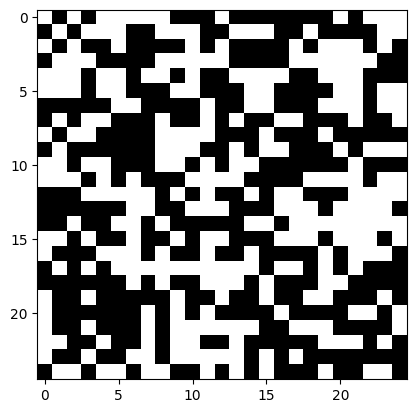

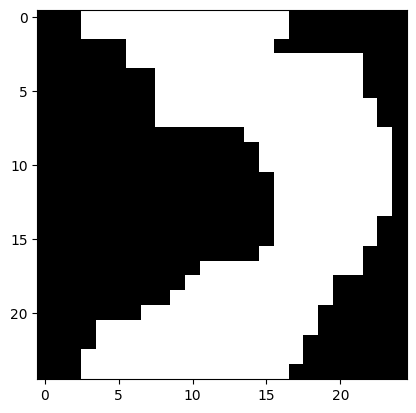

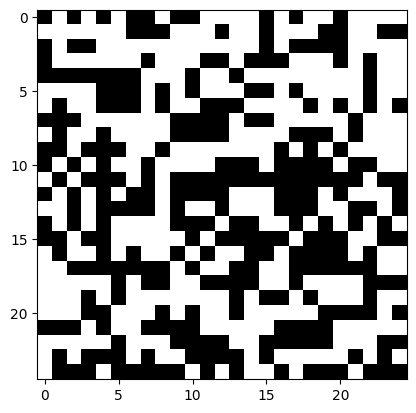

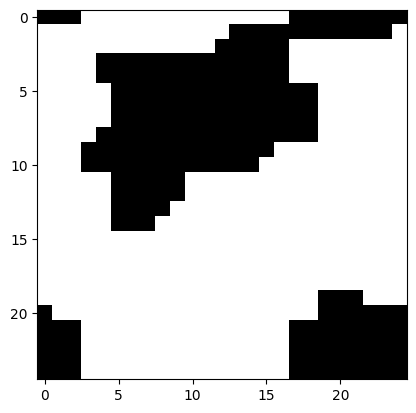

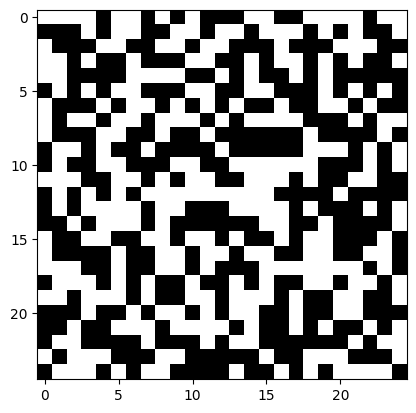

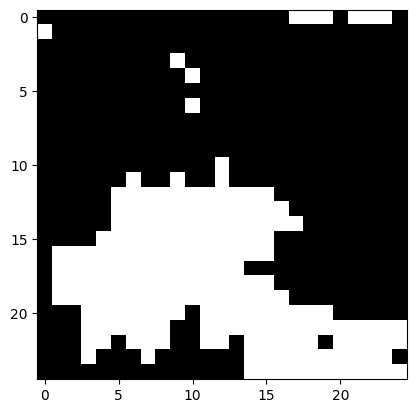

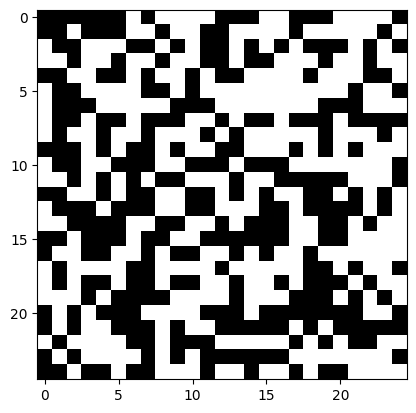

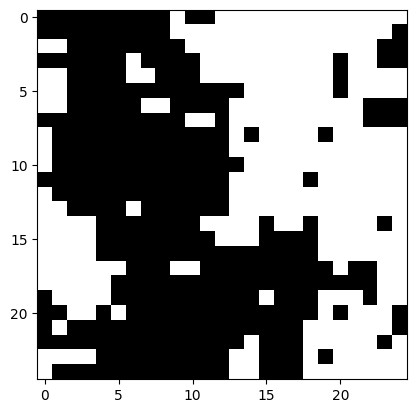

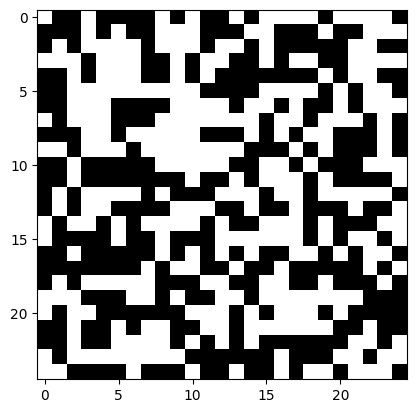

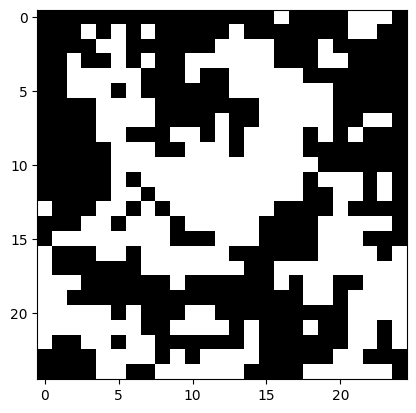

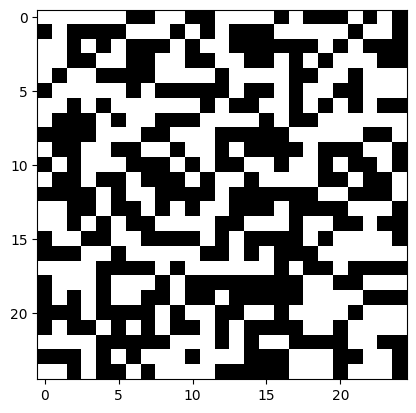

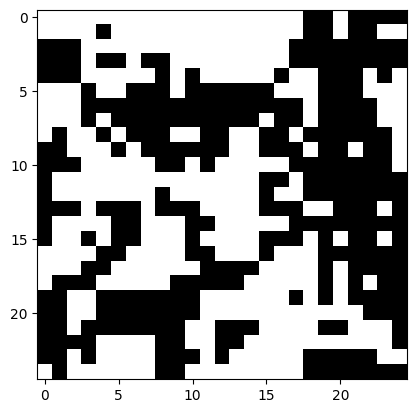

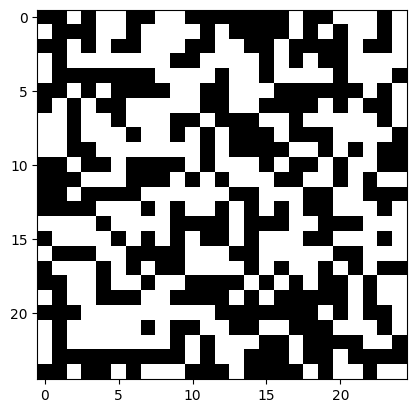

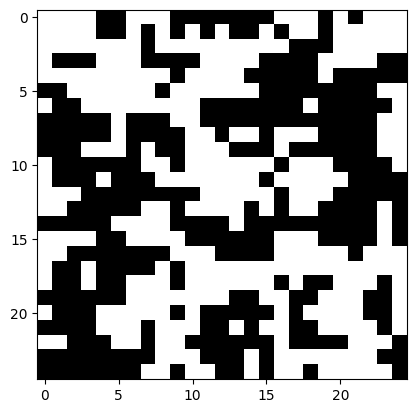

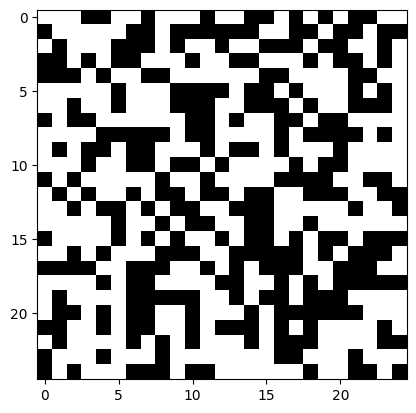

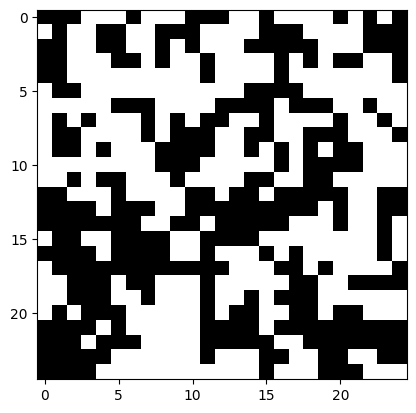

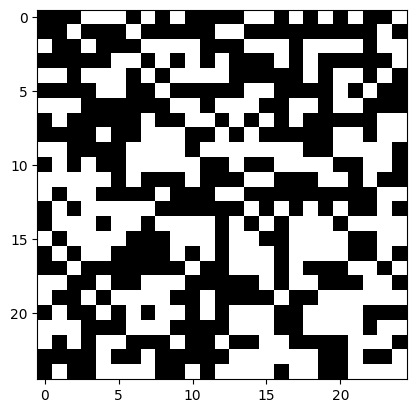

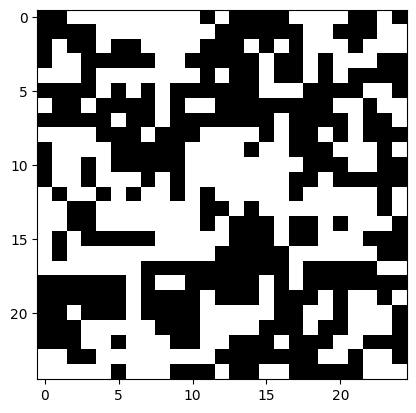

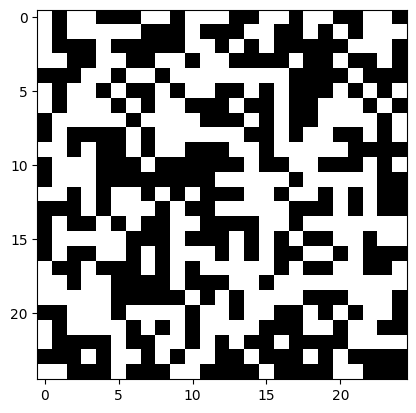

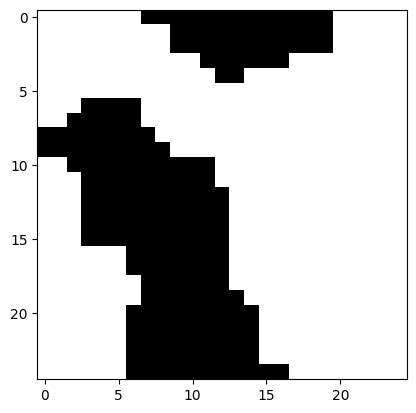

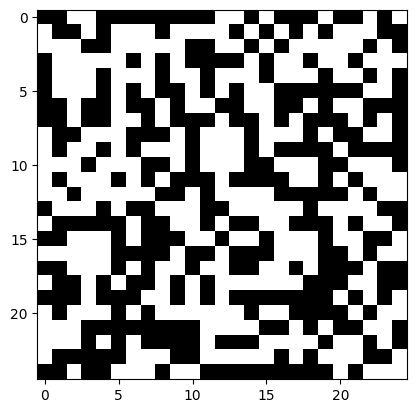

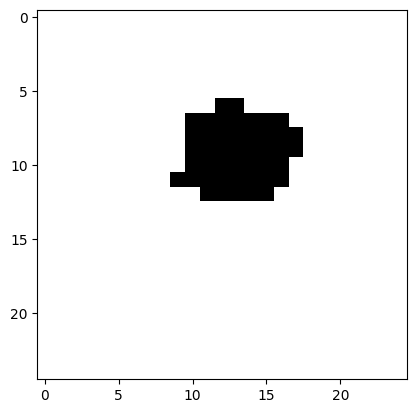

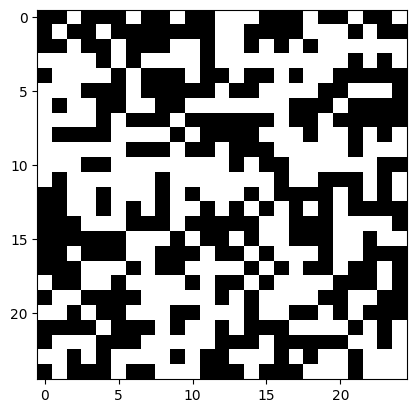

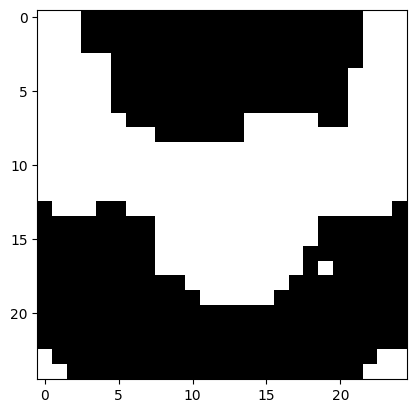

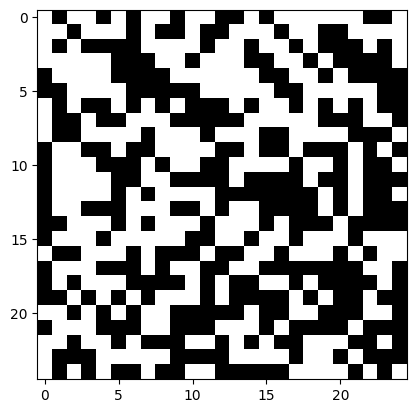

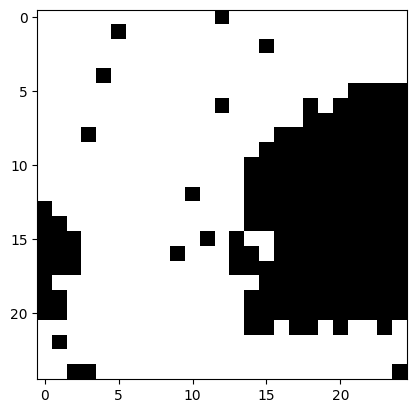

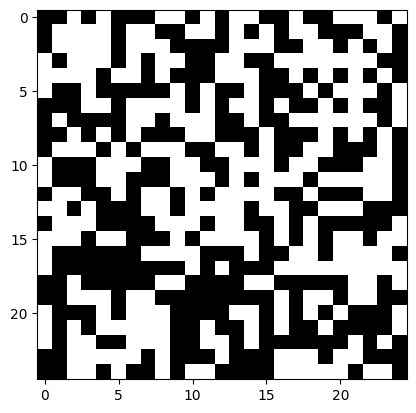

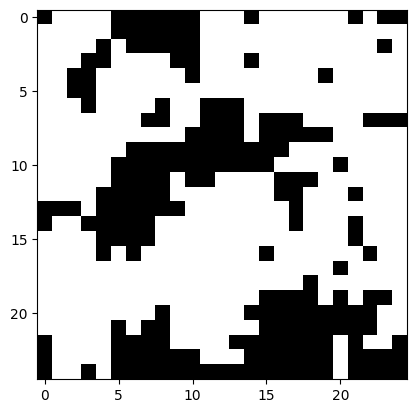

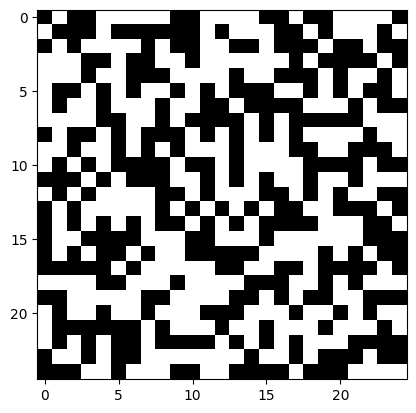

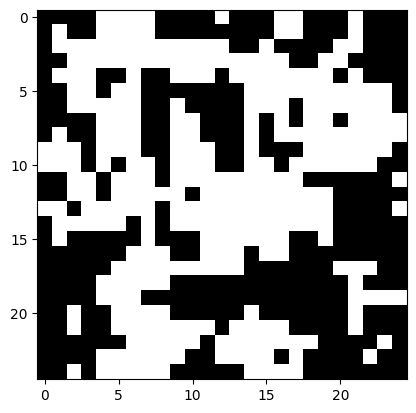

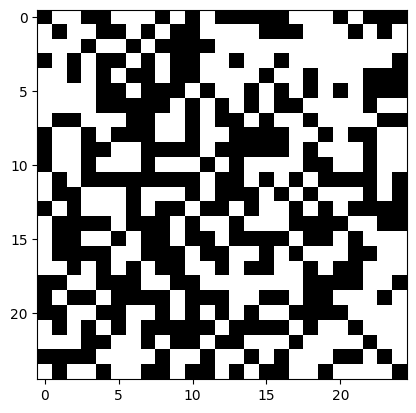

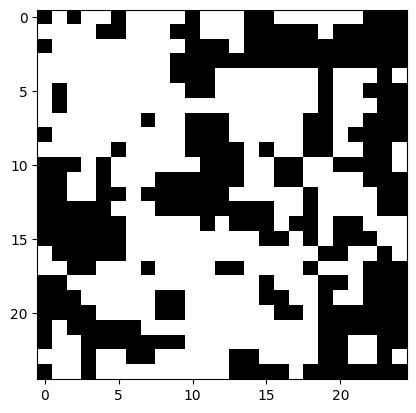

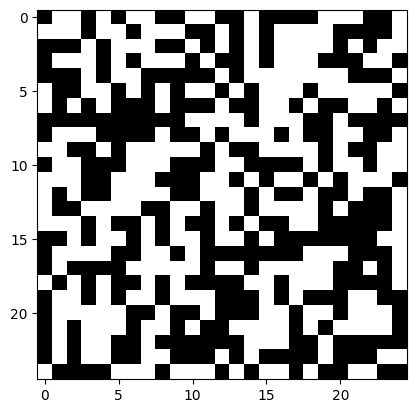

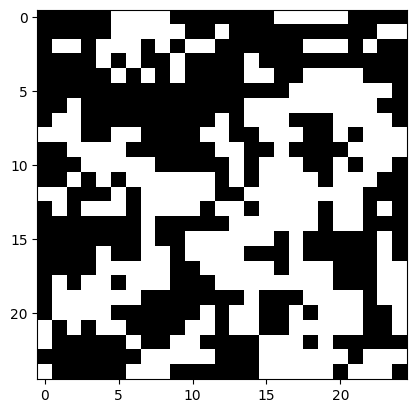

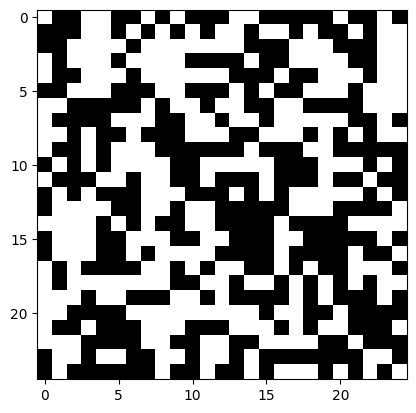

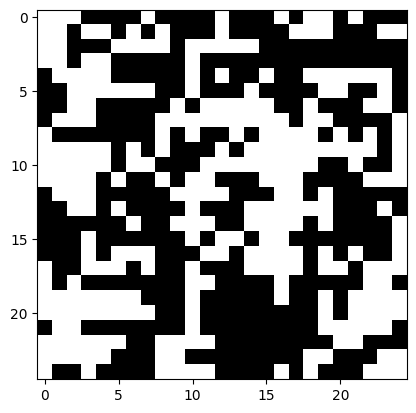

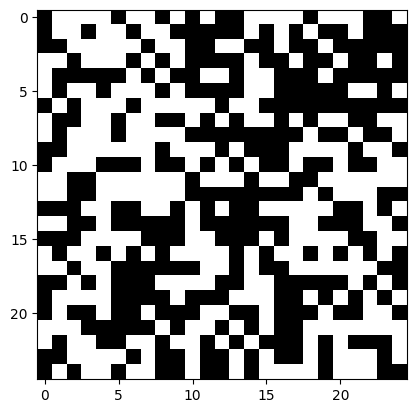

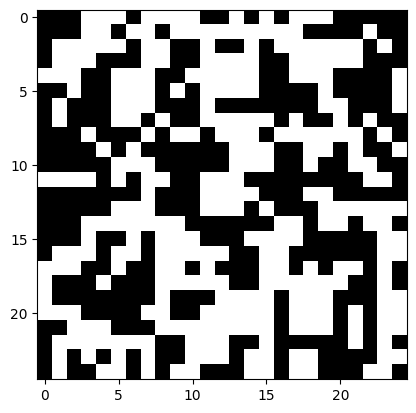

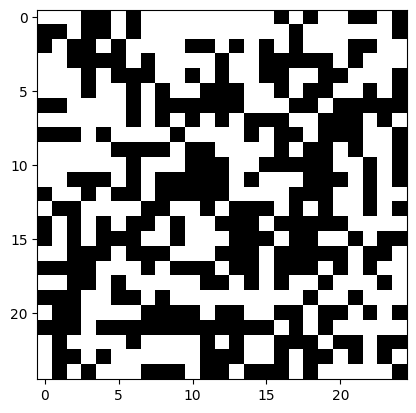

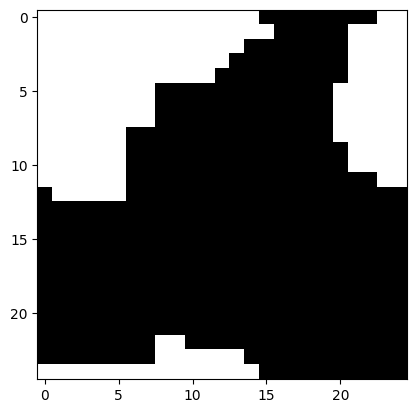

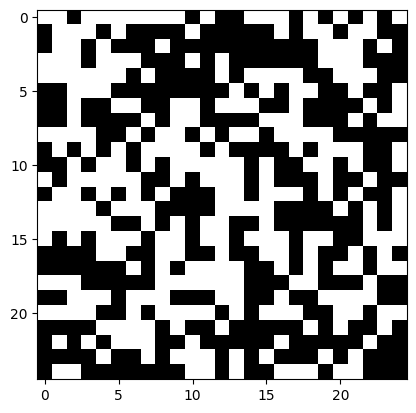

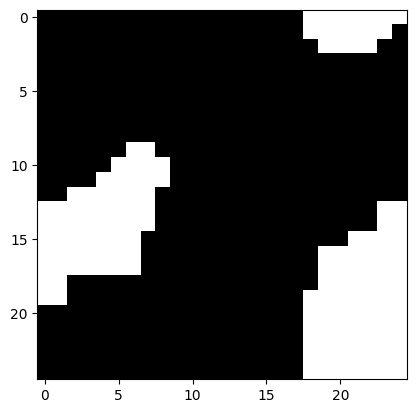

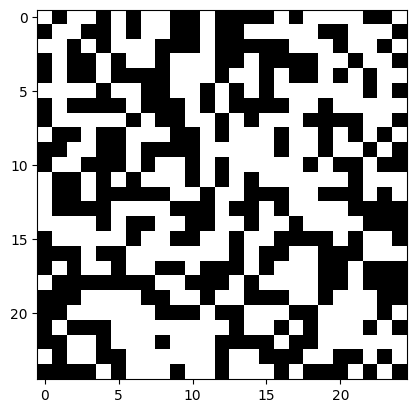

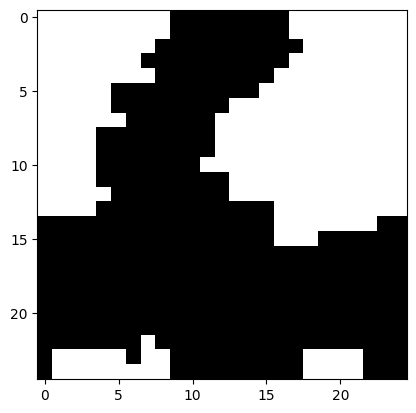

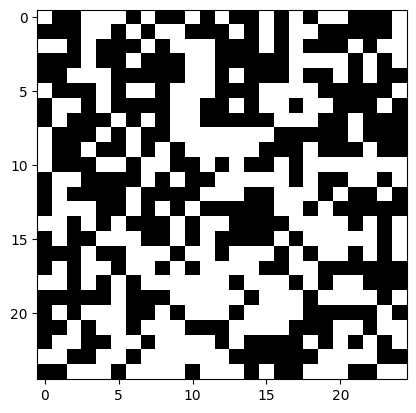

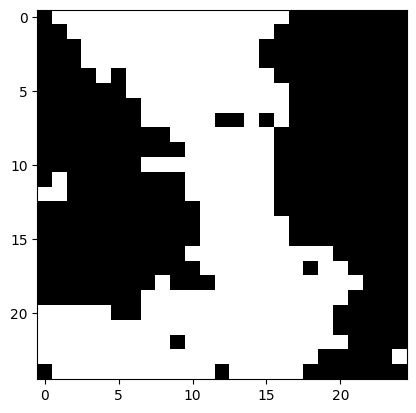

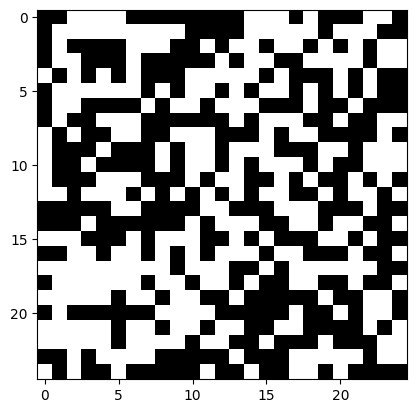

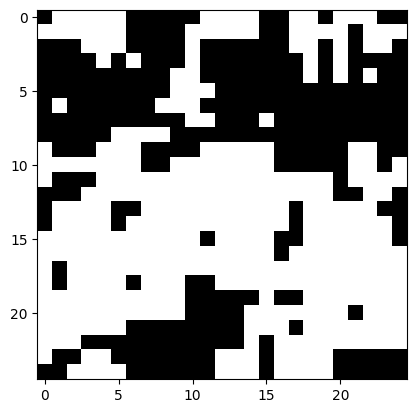

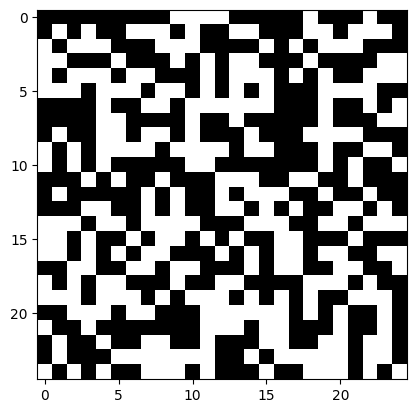

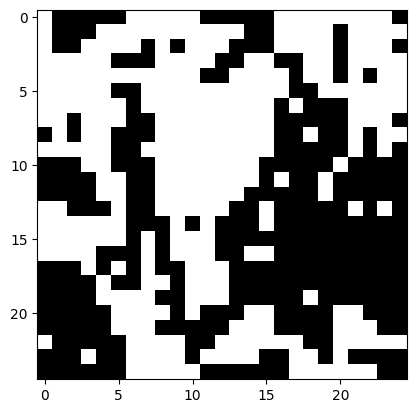

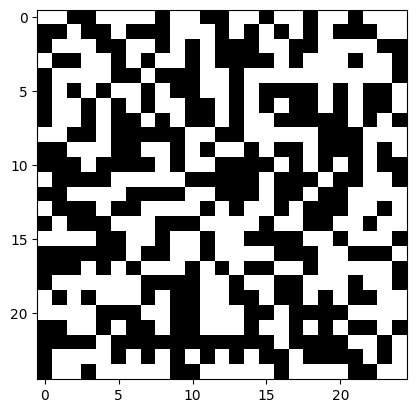

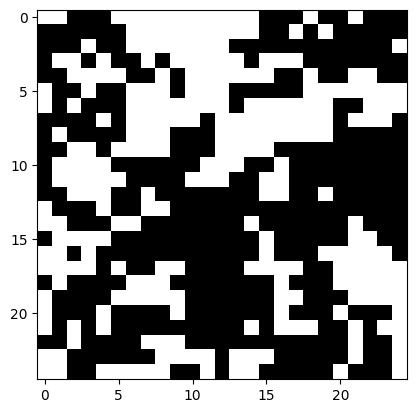

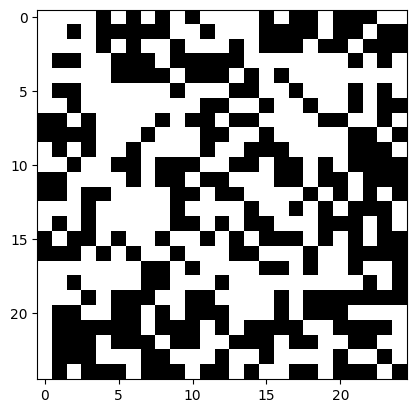

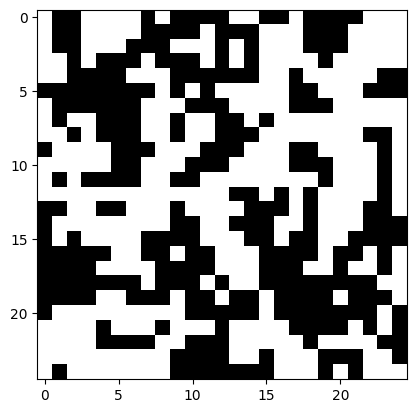

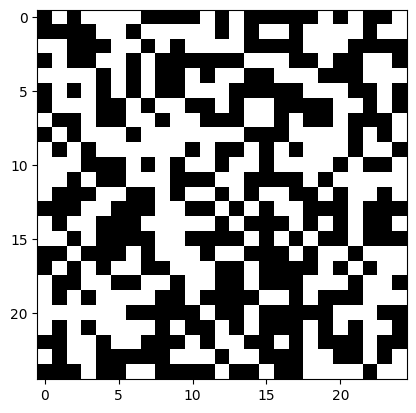

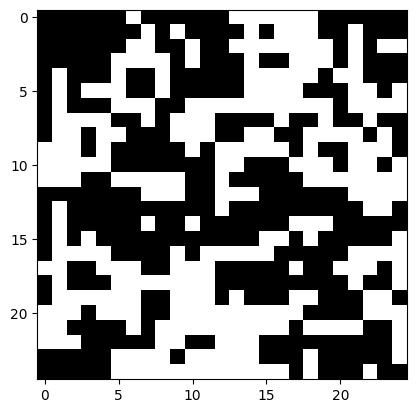

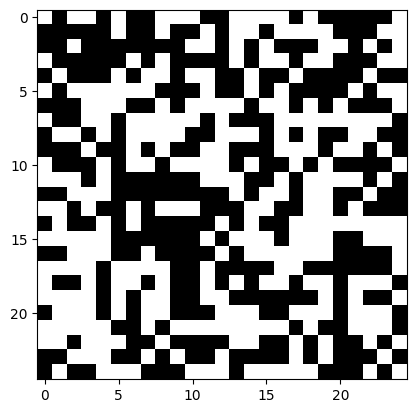

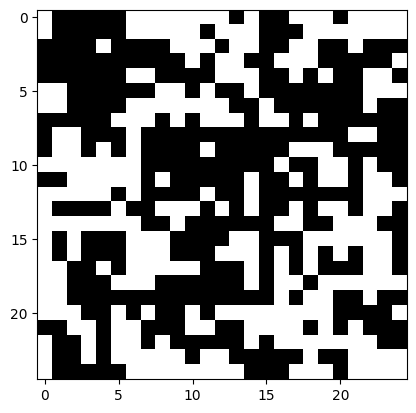

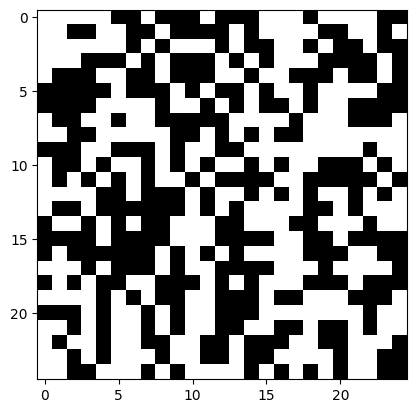

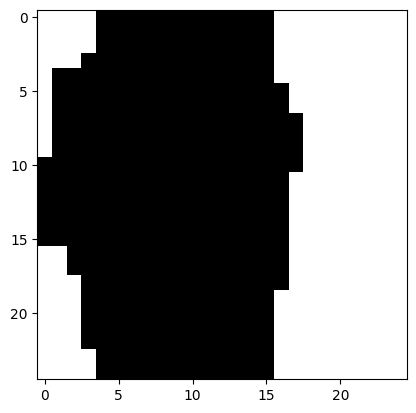

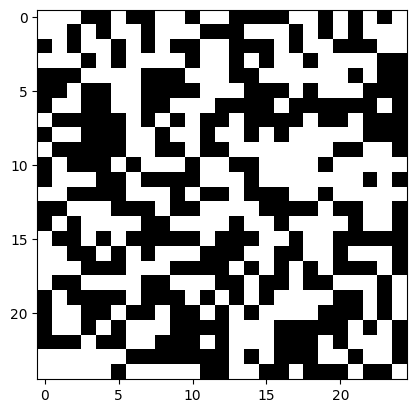

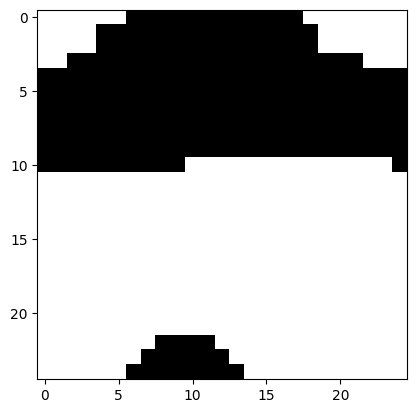

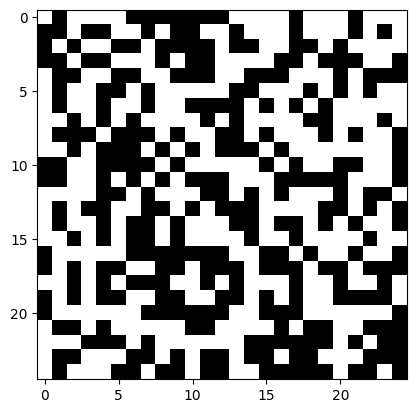

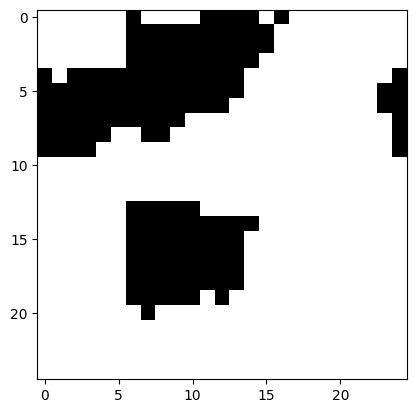

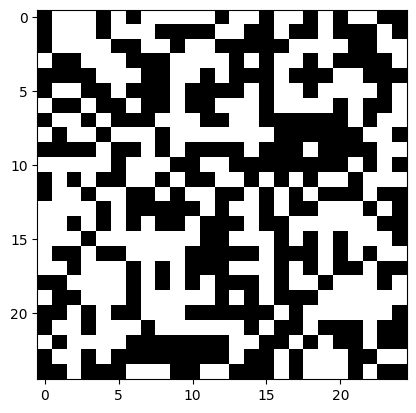

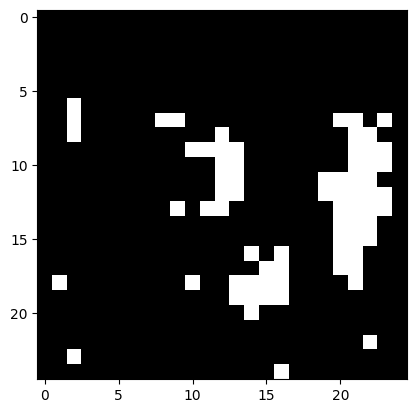

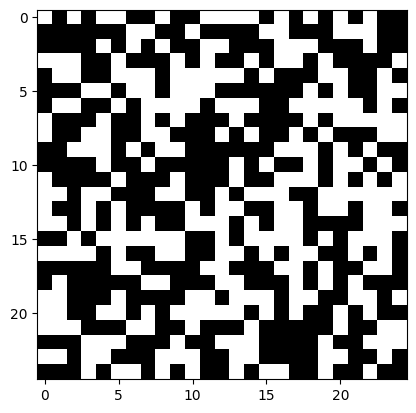

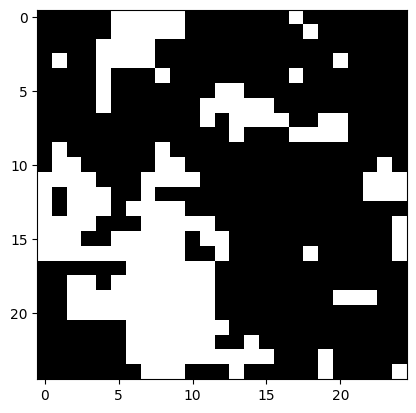

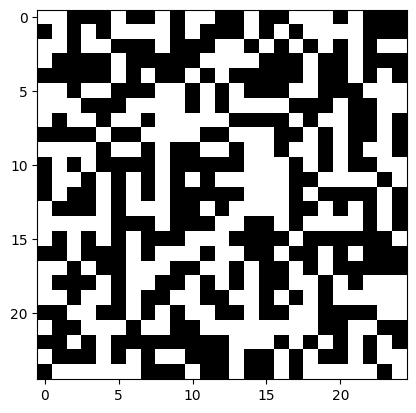

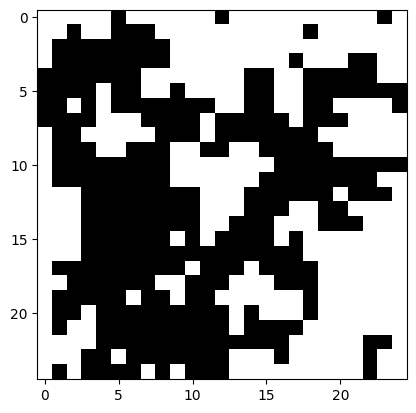

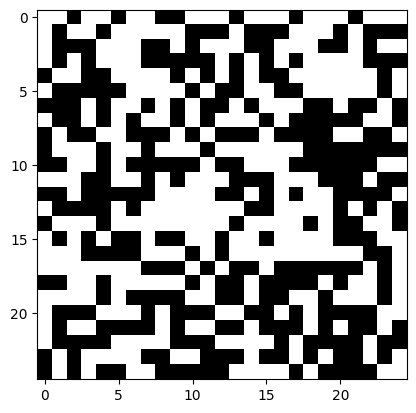

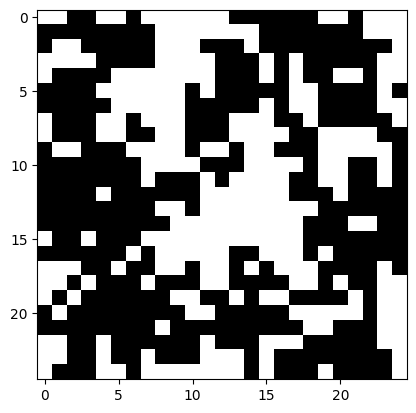

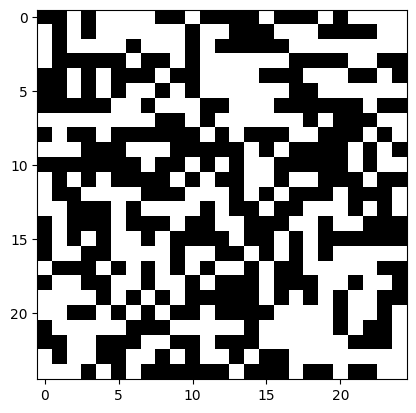

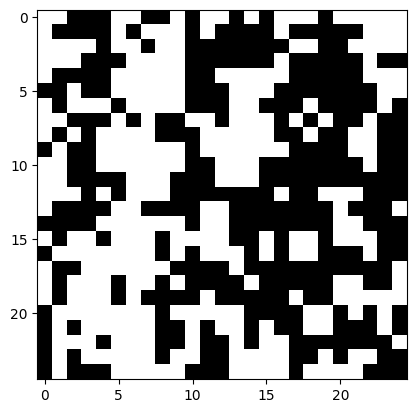

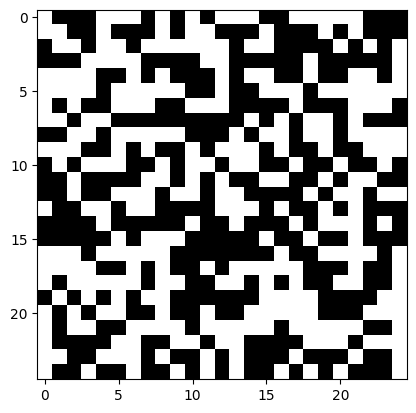

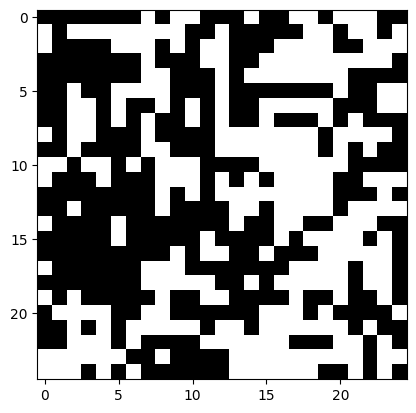

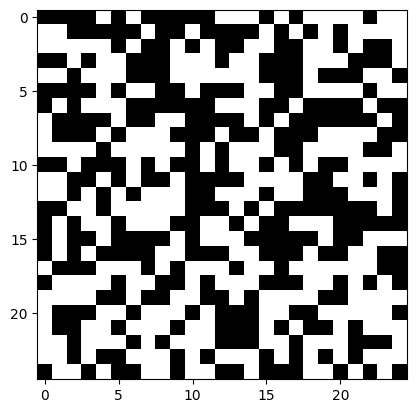

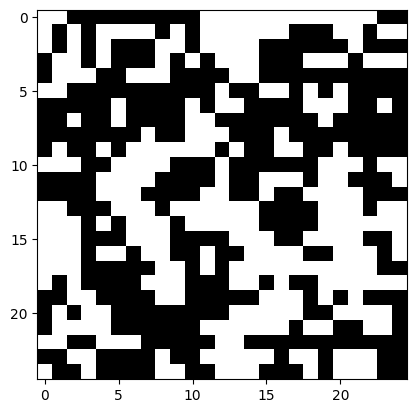

In [8]:
'''
The function $generate_data()$ generates mutliple spin configurations for different temperatures, uniformly distributed between $0.1\,J/k_{B}$ and $5\,J/k_{B}$.
'''
def generate_data(L, num_t, t_min=0.1, t_max=5, repeat=1):
    '''
    Parameters:
    L: Size of the square lattice (L × L)
    num_t: Number of different temperatures to sample
    t_min: Minimum temperature in units of J/k_B
    t_max: Maximum temperature in units of J/k_B
    repeat: Number of configurations to generate per temperature

    Returns:
    spinconfigs: List of generated spin configurations
    labels: Array indicating if temperature is above (1) or below (0) critical temperature
    '''

    # Specification of the number of times a spin of the configuration is randomly selected and flipped, i.e., the number of Monte Carlo steps
    n = L ** 3
    # Initialization of a list that stores the generated spin configurations 
    spinconfigs = []
    # Initialization of an array that stores the labels of each spin configuration indicating whether the temperature is below or above the critical value
    labels = np.zeros((num_t * repeat, 1))
    # Generating a number of $num_t$ different temperatures uniformly distributed between t_min and t_max
    temps = np.linspace(t_min, t_max, num=num_t)

    # Generate spin configurations for each temperature
    for i in range(repeat):
        # Generating a number of $num_t$ different temperatures and storing them inside the list spinconfigs
        # Storing the corresponding labels inside the array labels
        for j in range(num_t):
            # Generating a spin configuration of size $L\times L$ for a temperature from the array temps 
            spinconfig = generate_spinconfig(L, temps[j], n)
            # Saving the created spin configurations inside the spinconfigs list
            spinconfigs.append(spinconfig)
            # Storing the corresponding labels for the spin configurations inside the array labels, indicating whether the spin configuration's temperature is above or below the critical temperature, i.e., Label: 1 if T > T_c, 0 if T < T_c (T_c ≈ 2.269)
            labels[i * num_t + j, :] = (temps[j] > 2.269)
    return spinconfigs, labels


# Generation of the test and the training data set
spinconfigs_train, labels_train = generate_data(L=25, num_t=10, repeat=10)
spinconfigs_test, labels_test = generate_data(L=25, num_t=10, repeat=5)
